# Libraries

In [ ]:
!pip install qiskit[visualization]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 5.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 35.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 24.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 8.2 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=366f51a787e0413c239dc14e4ad06e5f0f449fa240cc5ebcee0e120fab5c1d41
  Stored in directory: /root/.cache/pip/wheels/b1/7a/33/9fdd892f784ed4afda62b685ae3703adf4c91aa0f524c28f03
Successfully built pylatexenc


In [ ]:
!pip install qiskit==1.4.2
!pip install qiskit-machine-learning
!pip install qiskit-aer
!pip install qiskit-algorithms

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 46.4 MB/s eta 0:00:00
  Attempting uninstall: qiskit
    Found existing installation: qiskit 2.0.0
    Uninstalling qiskit-2.0.0:
      Successfully uninstalled qiskit-2.0.0
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.6/231.6 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 44.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.5/310.5 kB 4.3 MB/s eta 0:00:00


In [ ]:
%pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=641add3e5c7e63898d7987c80bd7c13fc94488194c190d005860f67095a3295f
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import clear_output
from qiskit import QuantumCircuit
from qiskit.circuit import Parameter
from qiskit.circuit.library import RealAmplitudes, ZZFeatureMap
from qiskit_machine_learning.optimizers import COBYLA, L_BFGS_B
from qiskit_machine_learning.utils import algorithm_globals

from qiskit_machine_learning.algorithms.classifiers import NeuralNetworkClassifier, VQC
from qiskit_machine_learning.algorithms.regressors import NeuralNetworkRegressor, VQR
from qiskit_machine_learning.neural_networks import SamplerQNN, EstimatorQNN
from qiskit_machine_learning.circuit.library import QNNCircuit
import pandas as pd
import seaborn as sns

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,log_loss
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report



from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

# Data Exploration

In [ ]:
df = pd.read_csv('dataset.csv')
df = df.drop(['S.No', 'ID No', 'Name','Sex'], axis=1)

for col in df.columns:
    if df[col].isnull().any():
        mean_val = df[col].mean()
        df[col].fillna(mean_val, inplace=True)

<ipython-input-10-744e1ab08cc0>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mean_val, inplace=True)


In [ ]:
def classify_diabetes(row):
    if (
        row['Fasting'] >= 126 or
        row['Post Prandial'] >= 200 or
        row['HbA1C'] >= 6.5
    ):
        return True
    else:
        return False

df['Diabetic'] = df.apply(classify_diabetes, axis=1)

In [ ]:
df['Diabetic'].value_counts()

Diabetic
False    49
True      1
Name: count, dtype: int64

In [ ]:
df.head()

Age  Fasting  Post Prandial  GTT 1/2 Hr    GTT 1 Hr  GTT 1-1/2 Hr  \
0   38       87      38.142857  146.000000  129.000000    112.000000   
1   33      119      95.000000   89.000000   85.000000      5.500000   
2   45       87       0.000000  105.000000  110.000000     80.000000   
3   44       89      96.000000  133.234043  123.021277    106.223404   
4   44       97      38.142857  215.000000  202.000000    127.000000   

   GTT 2 Hr  HbA1C    MGV    Insulin  ...  D.Bilirubin  Hemoglobin   TSH3  \
0   85.0000    5.8  120.0   6.200000  ...         0.10        10.9   1.31   
1  111.0000    6.9  174.0  47.000000  ...         1.50         2.7  15.85   
2   78.0000    5.7  117.0   4.800000  ...         0.10        14.1   2.74   
3   95.5625    6.2  131.0   3.400000  ...         0.20         9.0   2.71   
4   77.0000    5.4  109.0   7.441176  ...         0.17        14.9   5.52   

   UricAcid  Homosystiene  hs-CRP  SOD  LPO  Apo B/Apo  Diabetic  
0  3.000000     13.210000     0.0  0.0  0.0        0.0     False  
1  3.628571     12.731875     0.0  0.0  0.0        0.0      True  
2  3.000000     11.510000     0.0  0.0  0.0        0.0     False  
3  3.200000      7.450000     0.0  0.0  0.0        0.0     False  
4  3.800000     12.731875     0.0  0.0  0.0        0.0     False  

[5 rows x 39 columns]

In [ ]:
from imblearn.over_sampling import RandomOverSampler

X = df.drop(columns=['Diabetic'])
y = df['Diabetic']

ros = RandomOverSampler(sampling_strategy='auto', random_state=42)

X_resampled, y_resampled = ros.fit_resample(X, y)

df = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.DataFrame(y_resampled, columns=['Diabetic'])], axis=1)

print(df['Diabetic'].value_counts())

Diabetic
False    49
True     49
Name: count, dtype: int64


In [ ]:
from sklearn.preprocessing import MinMaxScaler

X = df.drop(columns=['Diabetic'])
scaler = MinMaxScaler()

X_scaled = scaler.fit_transform(X)

df_scaled = pd.DataFrame(X_scaled, columns=X.columns)

df_scaled['Diabetic'] = df['Diabetic']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 39 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                98 non-null     int64  
 1   Fasting            98 non-null     int64  
 2   Post Prandial      98 non-null     float64
 3   GTT 1/2 Hr         98 non-null     float64
 4   GTT 1 Hr           98 non-null     float64
 5   GTT 1-1/2 Hr       98 non-null     float64
 6   GTT 2 Hr           98 non-null     float64
 7   HbA1C              98 non-null     float64
 8   MGV                98 non-null     float64
 9   Insulin            98 non-null     float64
 10  T.Cholesterol      98 non-null     int64  
 11  TGL                98 non-null     int64  
 12  HDL                98 non-null     float64
 13  LDL                98 non-null     float64
 14  Chol/HDL.Ratio     98 non-null     float64
 15  Apolipoprotein-A1  98 non-null     float64
 16  Apolipoprotein-B   98 non-nu

# Plottings

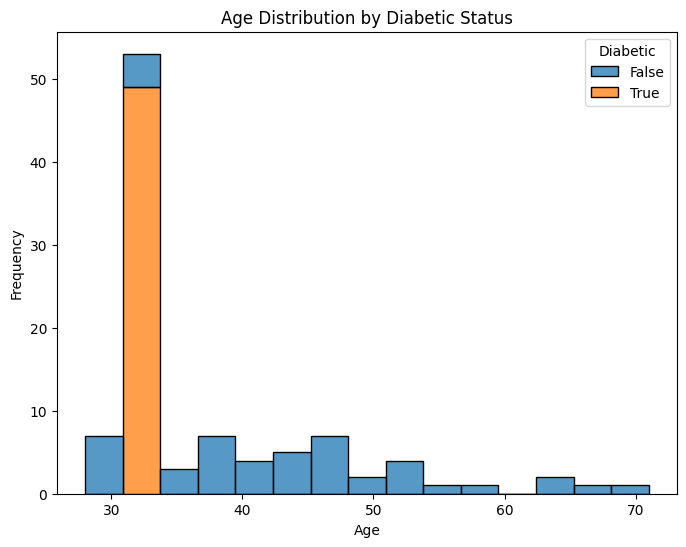

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Age', hue='Diabetic', multiple='stack', bins=15)
plt.title('Age Distribution by Diabetic Status')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

<ipython-input-27-373eb63f8a81>:2: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df, x='Fasting', hue='Diabetic', fill=True)


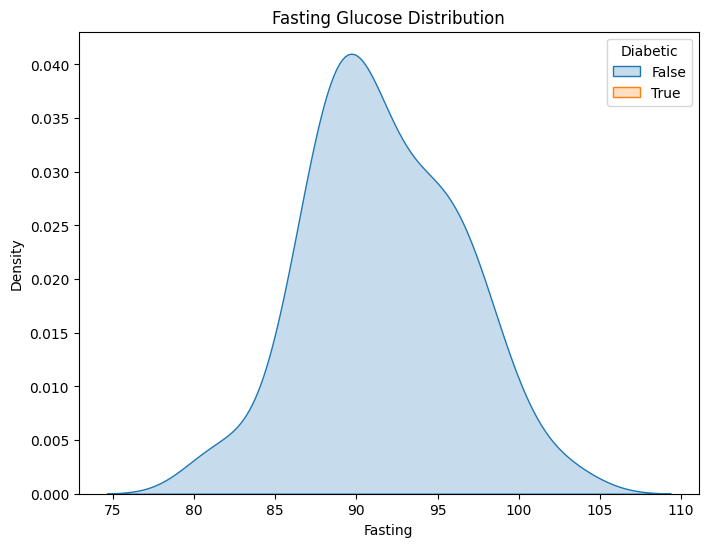

In [ ]:
plt.figure(figsize=(8, 6))
sns.kdeplot(data=df, x='Fasting', hue='Diabetic', fill=True)
plt.title('Fasting Glucose Distribution')
plt.show()

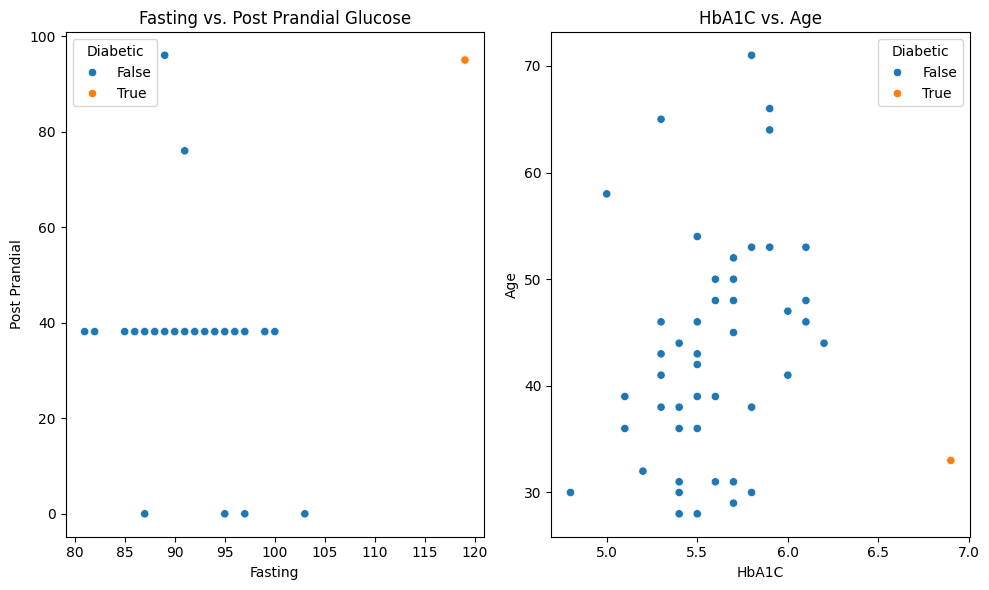

In [ ]:
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='Fasting', y='Post Prandial', hue='Diabetic')
plt.title('Fasting vs. Post Prandial Glucose')

plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x='HbA1C', y='Age', hue='Diabetic')
plt.title('HbA1C vs. Age')

plt.tight_layout()
plt.show()


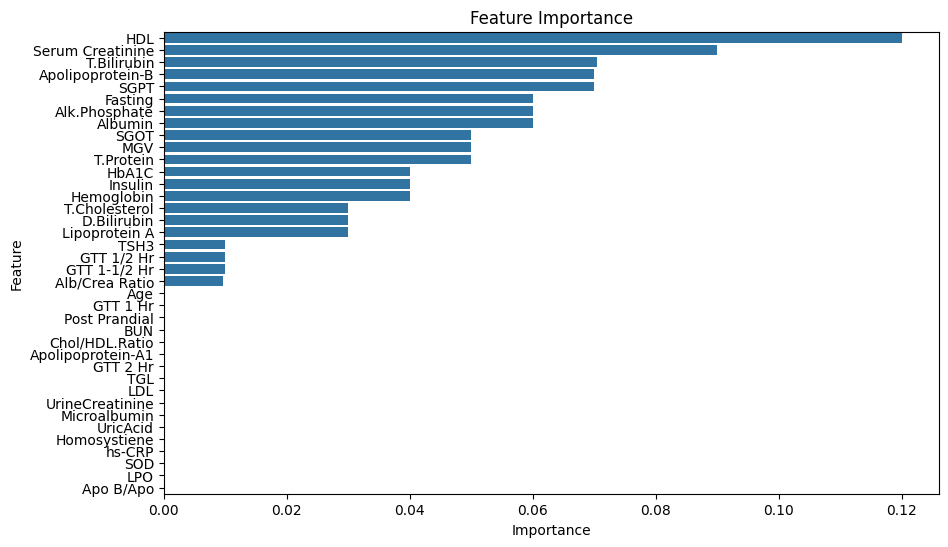

In [ ]:
from sklearn.ensemble import RandomForestClassifier

X = df.drop(columns=['Diabetic'])
y = df['Diabetic']

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

feature_importance = model.feature_importances_

feature_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
feature_df = feature_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_df)
plt.title('Feature Importance')
plt.show()

# Traditional Models

In [ ]:
X = df_scaled.drop(columns=['Diabetic'])
y = df_scaled['Diabetic']

X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [ ]:
classifiers = {
    "KNN": KNeighborsClassifier(3),
    "SVC": SVC(kernel="rbf", C=0.025, probability=True),
    "Decision Tree Classifier": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "GaussianNB": GaussianNB(),
    "Logistic Regression": LogisticRegression()}


log_cols=["Classifier", "Accuracy"]
log = pd.DataFrame(columns=log_cols)

m_scores = {}
for name,clf in classifiers.items():
    clf.fit(X_train, y_train)

    train_predictions = clf.predict(X_test)
    m_scores[name] = accuracy_score(y_test, train_predictions)
    print(f"{clf}"+": {:.5%}".format(m_scores[name]))

print(f'\033[94m='*30)

KNeighborsClassifier(n_neighbors=3): 79.7%
SVC(C=0.025, probability=True): 87.5%
DecisionTreeClassifier(): 82.6%
RandomForestClassifier(): 90.3%
GaussianNB(): 81.3%
LogisticRegression(): 85.7%


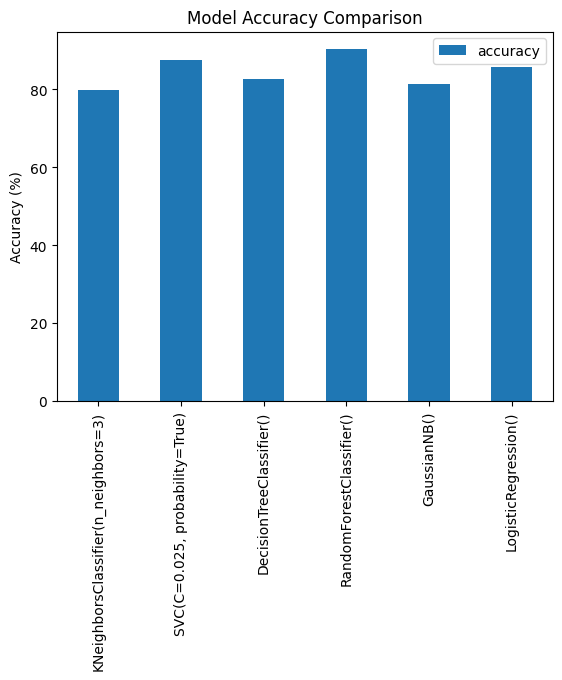

In [ ]:
model_compare = pd.DataFrame(m_scores, index=["accuracy"])
model_compare.T.plot.bar()

In [ ]:
model = classifiers["Random Forest"]

In [ ]:
feature_importance = model.feature_importances_

In [ ]:
from lime.lime_tabular import LimeTabularExplainer

explainer = LimeTabularExplainer(X_train.values,
                                 feature_names=X_train.columns,
                                 class_names=['Non Diabetic', 'Diabetic'],
                                 mode='classification')
exp = explainer.explain_instance(X_test.iloc[0], model.predict_proba)
exp.show_in_notebook(show_all=False)

/usr/local/lib/python3.11/dist-packages/lime/discretize.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/usr/local/lib/python3.11/dist-packages/lime/discretize.py:110: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/usr/local/lib/python3.11/dist-packages/lime/lime_tabular.py:544: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.

# Quantum ML

## QSVC

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report

from qiskit_aer import AerSimulator
from qiskit.circuit.library import ZZFeatureMap
from qiskit_machine_learning.algorithms import QSVC
from qiskit_machine_learning.kernels import FidelityQuantumKernel
from qiskit.visualization import circuit_drawer

In [ ]:
scaler = StandardScaler()
X = df_scaled.drop(columns=['Diabetic'])
y = df_scaled['Diabetic']
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=4)
X_pca = pca.fit_transform(X_scaled)

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=2)

### ZZ Feature Map

In [ ]:
feature_map = ZZFeatureMap(feature_dimension=4, entanglement='full', reps=12)

simulator = AerSimulator()
quantum_kernel = FidelityQuantumKernel(feature_map=feature_map)

qsvc_zzmap = QSVC(quantum_kernel=quantum_kernel)
qsvc_zzmap

QSVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
     decision_function_shape='ovr', degree=3, gamma='scale', max_iter=-1,
     probability=False,
     quantum_kernel=<qiskit_machine_learning.kernels.fidelity_quantum_kernel.FidelityQuantumKernel object at 0x7cb4101de850>,
     random_state=None, shrinking=True, tol=0.001, verbose=False)

In [ ]:
qsvc_zzmap.fit(X_train, y_train)

QSVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
     decision_function_shape='ovr', degree=3, gamma='scale', max_iter=-1,
     probability=False,
     quantum_kernel=<qiskit_machine_learning.kernels.fidelity_quantum_kernel.FidelityQuantumKernel object at 0x7cb4101de850>,
     random_state=None, shrinking=True, tol=0.001, verbose=False)

In [ ]:
y_pred = qsvc_zzmap.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       1.00      1.00      1.00        17
        True       1.00      1.00      1.00        13

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [ ]:
import pylatexenc

In [ ]:
%matplotlib inline
circuit = feature_map.assign_parameters([0, 0, 0, 0])
circuit_drawer(circuit, output='mpl', style={
    'displaycolor': {
        'u1': '#ff5733',
        'u2': '#33ff57',
        'u3': '#3357ff',
        'cx': '#ff33a1'
    },
    'fontsize': 12,
    'subfontsize': 10
})
plt.show()

In [ ]:
import matplotlib.pyplot as plt
plt.switch_backend('inline')

In [ ]:
print(feature_map)

     ┌────────────────────────────────────┐
q_0: ┤0                                   ├
     │                                    │
q_1: ┤1                                   ├
     │  ZZFeatureMap(x[0],x[1],x[2],x[3]) │
q_2: ┤2                                   ├
     │                                    │
q_3: ┤3                                   ├
     └────────────────────────────────────┘


In [ ]:
circuit_drawer(feature_map.decompose(), output='text')

┌───┐┌─────────────┐                                               »
q_0: ┤ H ├┤ P(2.0*x[0]) ├──■────────────────────────────────────■────■──»
     ├───┤├─────────────┤┌─┴─┐┌──────────────────────────────┐┌─┴─┐  │  »
q_1: ┤ H ├┤ P(2.0*x[1]) ├┤ X ├┤ P(2.0*(π - x[0])*(π - x[1])) ├┤ X ├──┼──»
     ├───┤├─────────────┤└───┘└──────────────────────────────┘└───┘┌─┴─┐»
q_2: ┤ H ├┤ P(2.0*x[2]) ├──────────────────────────────────────────┤ X ├»
     ├───┤├─────────────┤                                          └───┘»
q_3: ┤ H ├┤ P(2.0*x[3]) ├───────────────────────────────────────────────»
     └───┘└─────────────┘                                               »
«                                                    »
«q_0: ──────────────────────────────────■─────────■──»
«                                       │         │  »
«q_1: ──────────────────────────────────┼────■────┼──»
«     ┌──────────────────────────────┐┌─┴─┐┌─┴─┐  │  »
«q_2: ┤ P(2.0*(π - x[0])*(π - x[2])) ├┤ X ├┤ X ├──┼──»
«     └──────────────────────────────┘└───┘└───┘┌─┴─┐»
«q_3: ──────────────────────────────────────────┤ X ├»
«                                               └───┘»
«                                               ┌───┐»
«q_0: ───────────────────────────────────────■──┤ H ├»
«                                            │  └───┘»
«q_1: ──────────────────────────────────■────┼────■──»
«     ┌──────────────────────────────┐┌─┴─┐  │    │  »
«q_2: ┤ P(2.0*(π - x[1])*(π - x[2])) ├┤ X ├──┼────┼──»
«     ├──────────────────────────────┤└───┘┌─┴─┐┌─┴─┐»
«q_3: ┤ P(2.0*(π - x[0])*(π - x[3])) ├─────┤ X ├┤ X ├»
«     └──────────────────────────────┘     └───┘└───┘»
«             ┌─────────────┐                   »
«q_0: ────────┤ P(2.0*x[0]) ├───────────────────»
«             └─────────────┘              ┌───┐»
«q_1: ──────────────────────────────────■──┤ H ├»
«                                       │  └───┘»
«q_2: ──────────────────────────────────┼────■──»
«     ┌──────────────────────────────┐┌─┴─┐┌─┴─┐»
«q_3: ┤ P(2.0*(π - x[1])*(π - x[3])) ├┤ X ├┤ X ├»
«     └──────────────────────────────┘└───┘└───┘»
«                                                                          »
«q_0: ──────────────────────────────────■──────────────────────────────────»
«             ┌─────────────┐         ┌─┴─┐┌──────────────────────────────┐»
«q_1: ────────┤ P(2.0*x[1]) ├─────────┤ X ├┤ P(2.0*(π - x[0])*(π - x[1])) ├»
«             └─────────────┘         └───┘└────────────┬───┬─────────────┘»
«q_2: ──────────────────────────────────■───────────────┤ H ├──────────────»
«     ┌──────────────────────────────┐┌─┴─┐             ├───┤              »
«q_3: ┤ P(2.0*(π - x[2])*(π - x[3])) ├┤ X ├─────────────┤ H ├──────────────»
«     └──────────────────────────────┘└───┘             └───┘              »
«                                                                        »
«q_0: ───────■─────────■────────────────────────────────────■─────────■──»
«          ┌─┴─┐       │                                    │         │  »
«q_1: ─────┤ X ├───────┼────────────────────────────────────┼────■────┼──»
«     ┌────┴───┴────┐┌─┴─┐┌──────────────────────────────┐┌─┴─┐┌─┴─┐  │  »
«q_2: ┤ P(2.0*x[2]) ├┤ X ├┤ P(2.0*(π - x[0])*(π - x[2])) ├┤ X ├┤ X ├──┼──»
«     ├─────────────┤└───┘└──────────────────────────────┘└───┘└───┘┌─┴─┐»
«q_3: ┤ P(2.0*x[3]) ├───────────────────────────────────────────────┤ X ├»
«     └─────────────┘                                               └───┘»
«                                               ┌───┐»
«q_0: ───────────────────────────────────────■──┤ H ├»
«                                            │  └───┘»
«q_1: ──────────────────────────────────■────┼────■──»
«     ┌──────────────────────────────┐┌─┴─┐  │    │  »
«q_2: ┤ P(2.0*(π - x[1])*(π - x[2])) ├┤ X ├──┼────┼──»
«     ├──────────────────────────────┤└───┘┌─┴─┐┌─┴─┐»
«q_3: ┤ P(2.0*(π - x[0])*(π - x[3])) ├─────┤ X ├┤ X ├»
«     └──────────────────────────────┘     └───┘└───┘»
«             ┌─────────────┐       

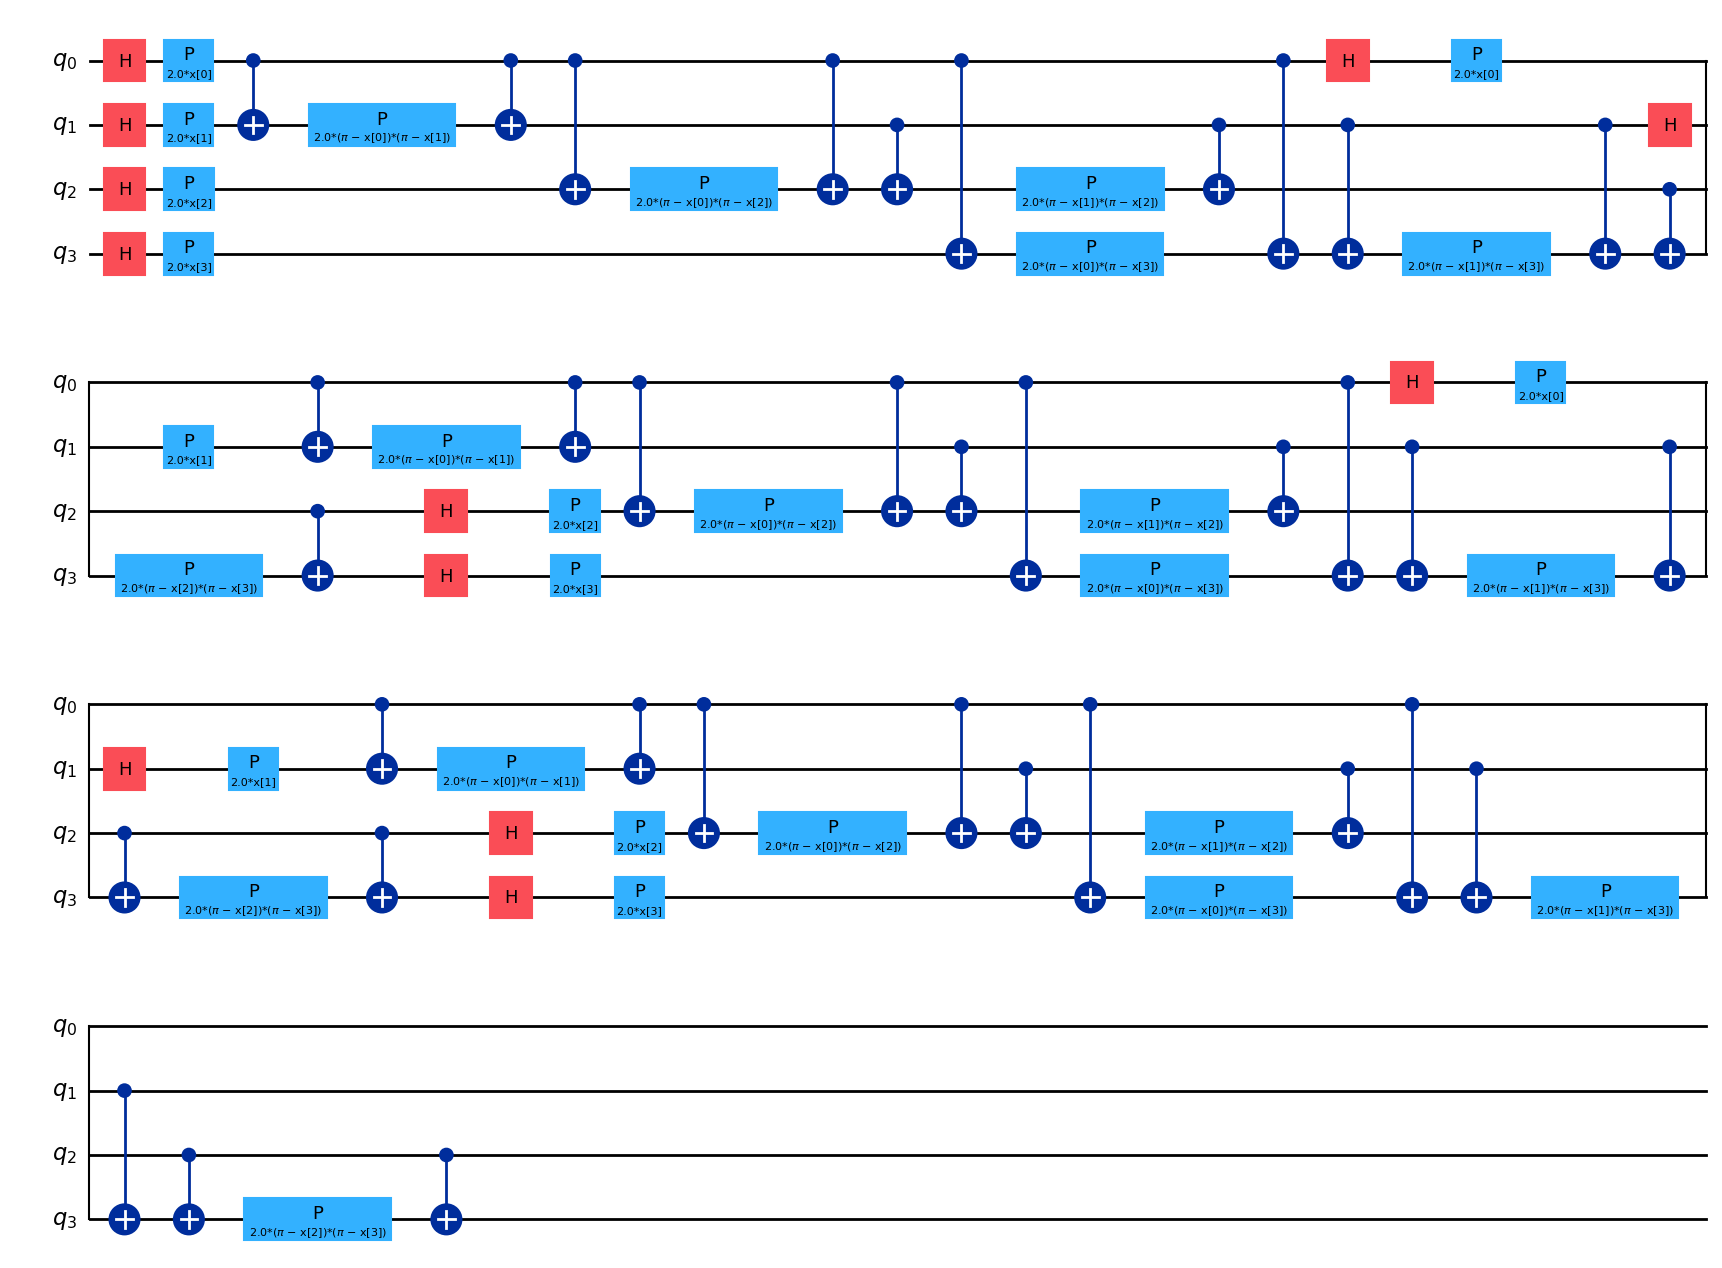

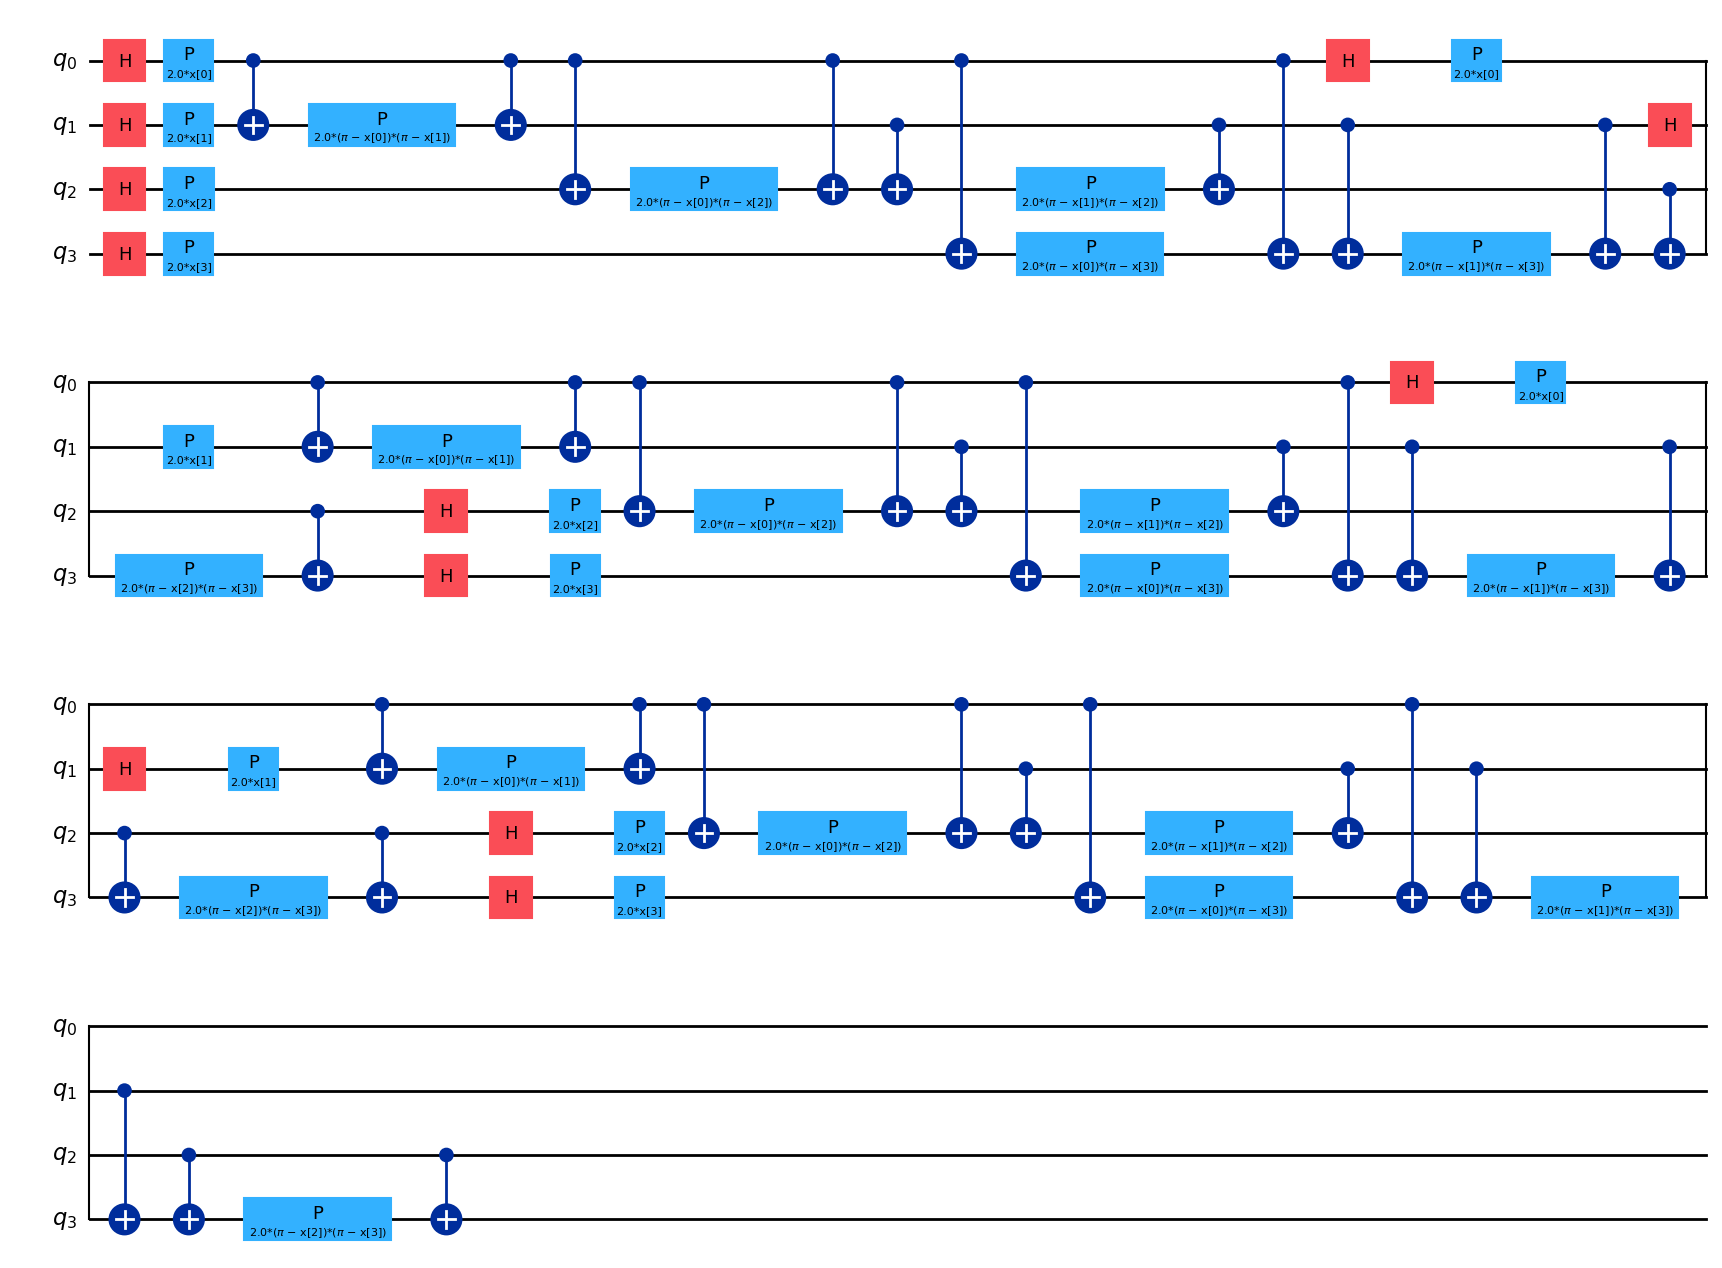

In [ ]:
feature_map.decompose().draw(output='mpl')

# pauli_feature_map.decompose().draw(output='mpl')
# plt.show()
decomposed_feature_map = feature_map.decompose()
fig =decomposed_feature_map.draw(output='mpl')
fig.savefig('zz_map_circuit.png', dpi=250)

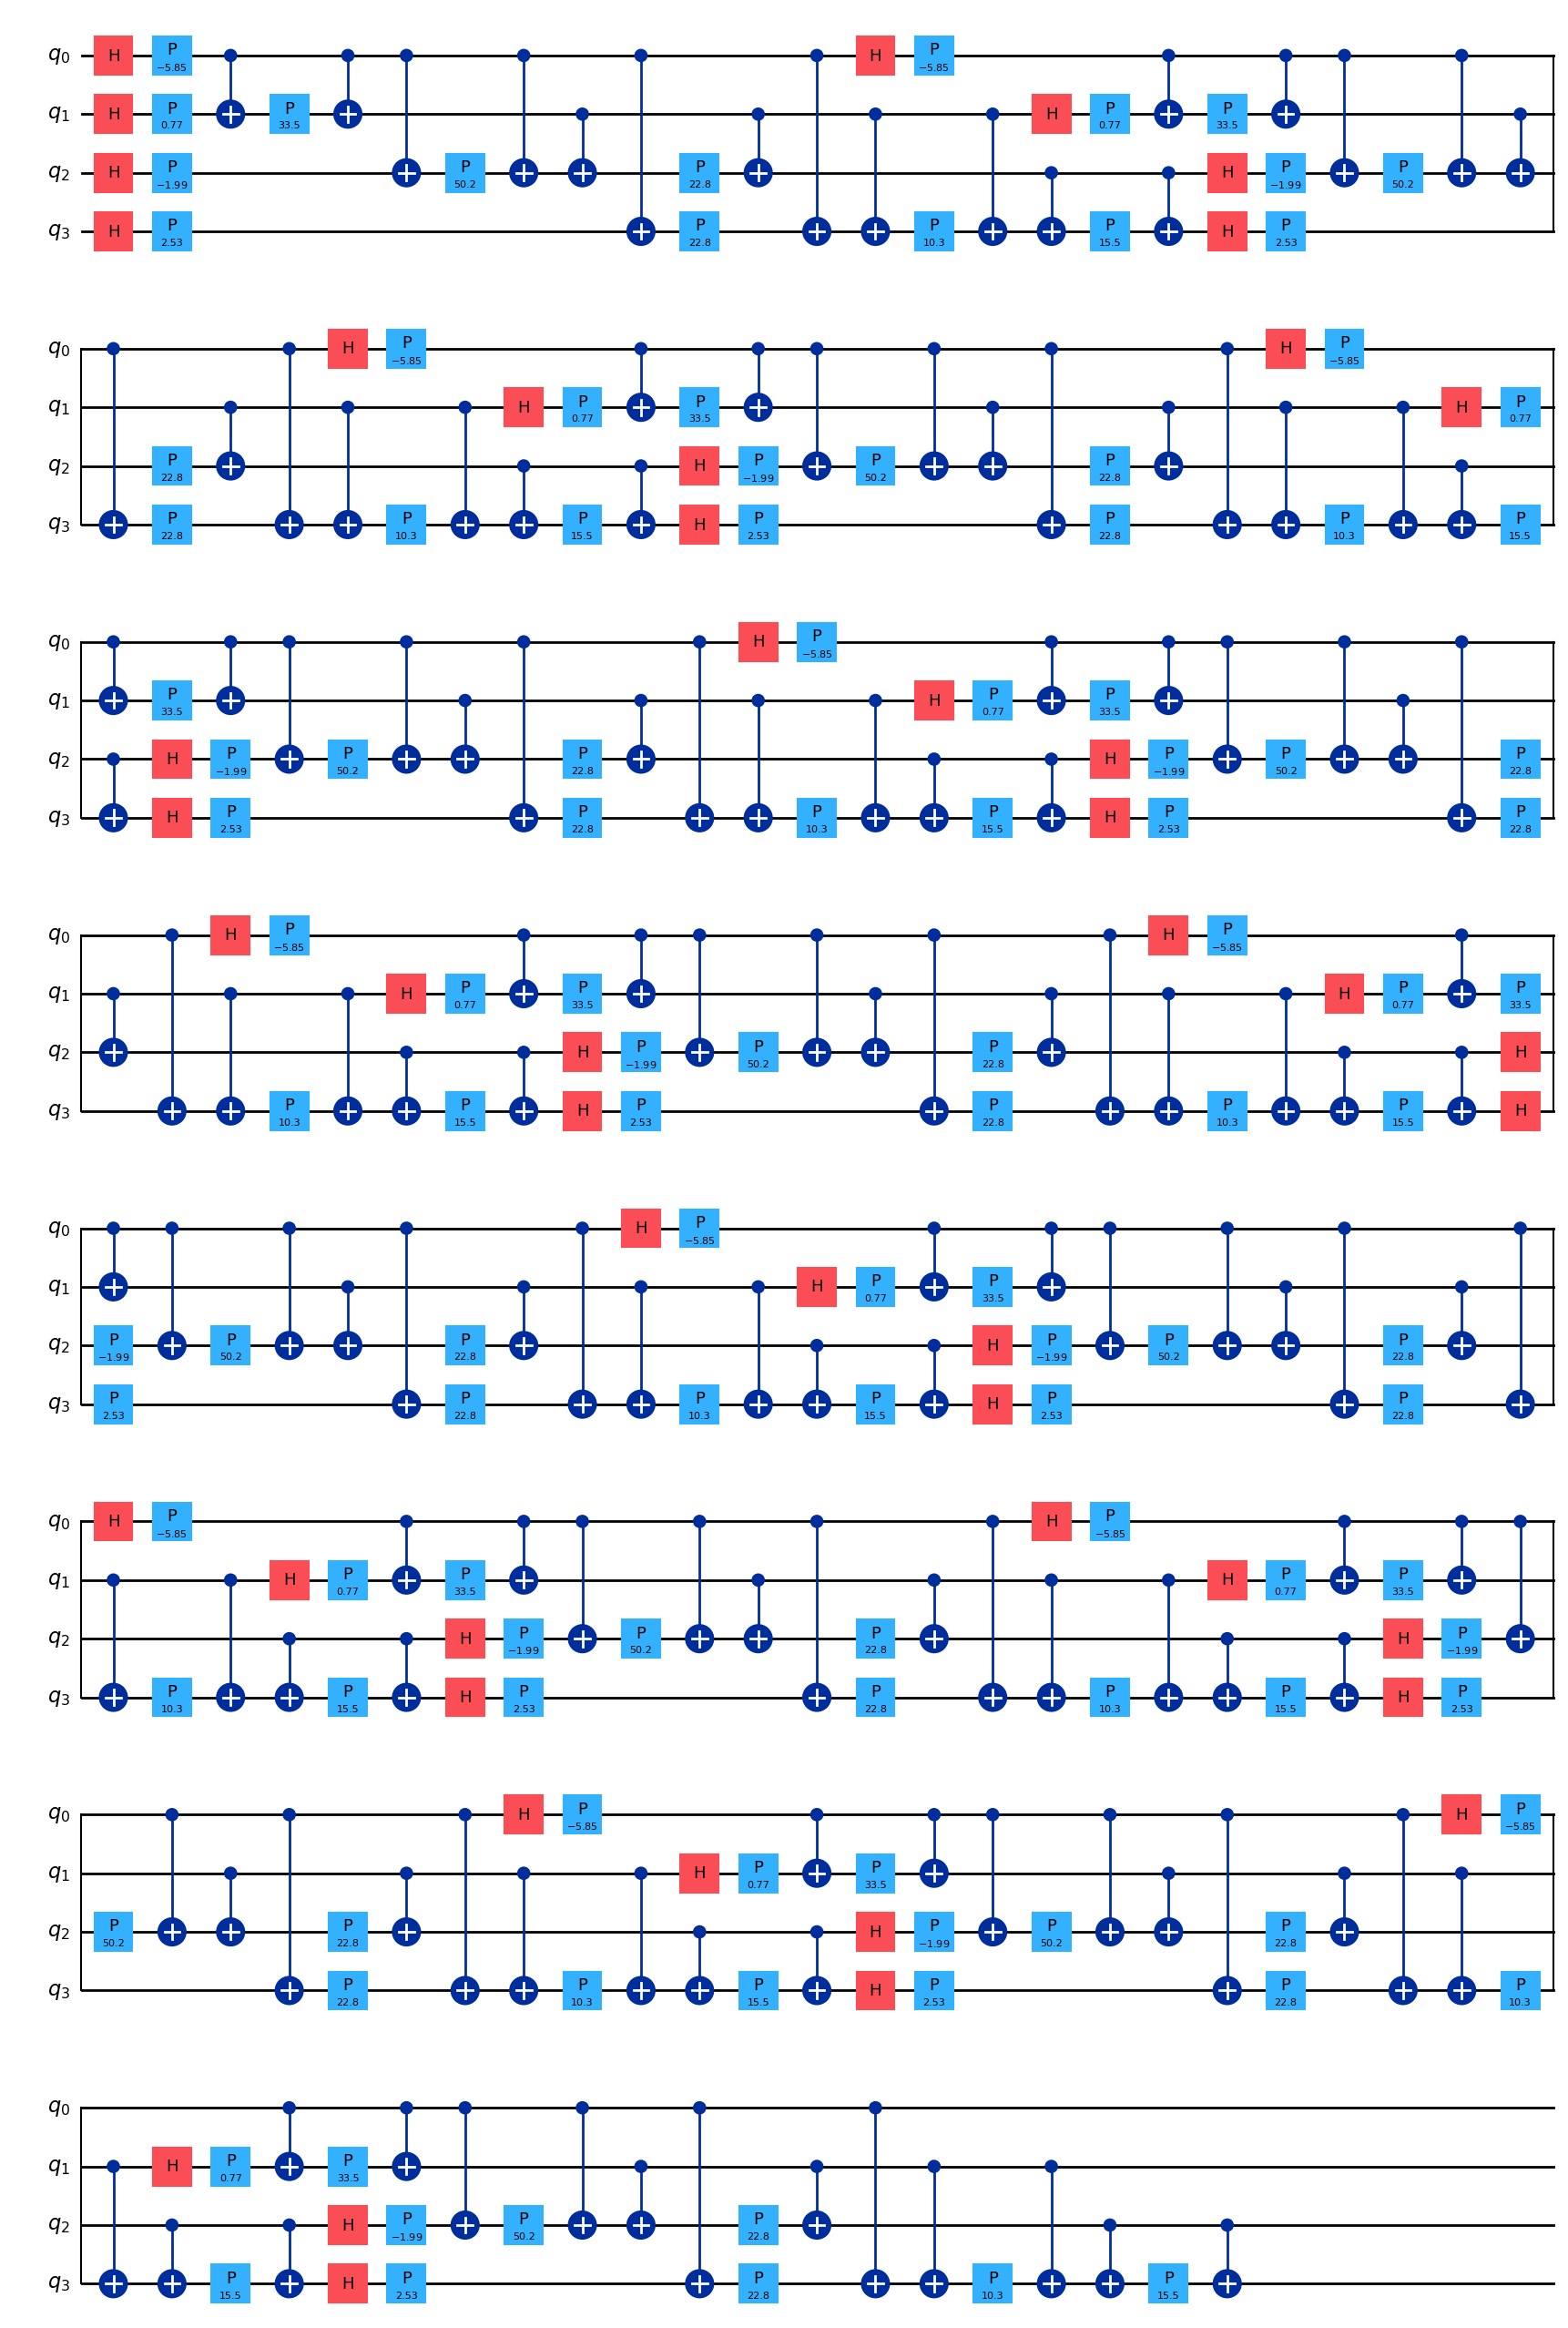

In [ ]:
sample_point = X_train[0]
qsvc_zzmap_bound_circuit = feature_map.assign_parameters(sample_point)
qsvc_zzmap_bound_circuit.decompose().draw(output='mpl')
plt.show()

### Pauli Feature Map

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, classification_report

from qiskit.circuit.library import PauliFeatureMap
from qiskit_machine_learning.algorithms import QSVC
from qiskit_machine_learning.kernels import FidelityQuantumKernel
from qiskit_aer import AerSimulator
from qiskit.visualization import circuit_drawer


In [ ]:
scaler = StandardScaler()
X = df_scaled.drop(columns=['Diabetic'])
y = df_scaled['Diabetic']
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=4)
X_pca = pca.fit_transform(X_scaled)

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=2)

In [ ]:
splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=2)
train_idx, test_idx = next(splitter.split(X_pca, y))

X_train, X_test = X_pca[train_idx], X_pca[test_idx]
y_train, y_test = y[train_idx], y[test_idx]

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [ ]:
pauli_feature_map = PauliFeatureMap(
    feature_dimension=X_pca.shape[1],
    reps=8,
    paulis=['X', 'Y', 'Z']
)

In [ ]:
simulator = AerSimulator()
quantum_kernel_pauli = FidelityQuantumKernel(feature_map=pauli_feature_map)

quantum_kernel_pauli.quantum_instance = simulator

In [ ]:
classifier_pauli = QSVC(quantum_kernel=quantum_kernel_pauli)

In [ ]:
classifier_pauli.fit(X_train, y_train_encoded)

QSVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
     decision_function_shape='ovr', degree=3, gamma='scale', max_iter=-1,
     probability=False,
     quantum_kernel=<qiskit_machine_learning.kernels.fidelity_quantum_kernel.FidelityQuantumKernel object at 0x7cb4503369d0>,
     random_state=None, shrinking=True, tol=0.001, verbose=False)

In [ ]:
y_pred = classifier_pauli.predict(X_test)
print(classification_report(y_test_encoded, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.93      0.97        15
           1       0.94      1.00      0.97        15

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [ ]:
y_pred = classifier_pauli.predict(X_test)

print("\nClassification Report:\n")
print(classification_report(y_test_encoded, y_pred))

accuracy = accuracy_score(y_test_encoded, y_pred)
print(f"\nAccuracy: {accuracy:.4f}")


Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.93      0.97        15
           1       0.94      1.00      0.97        15

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30


Accuracy: 0.9667


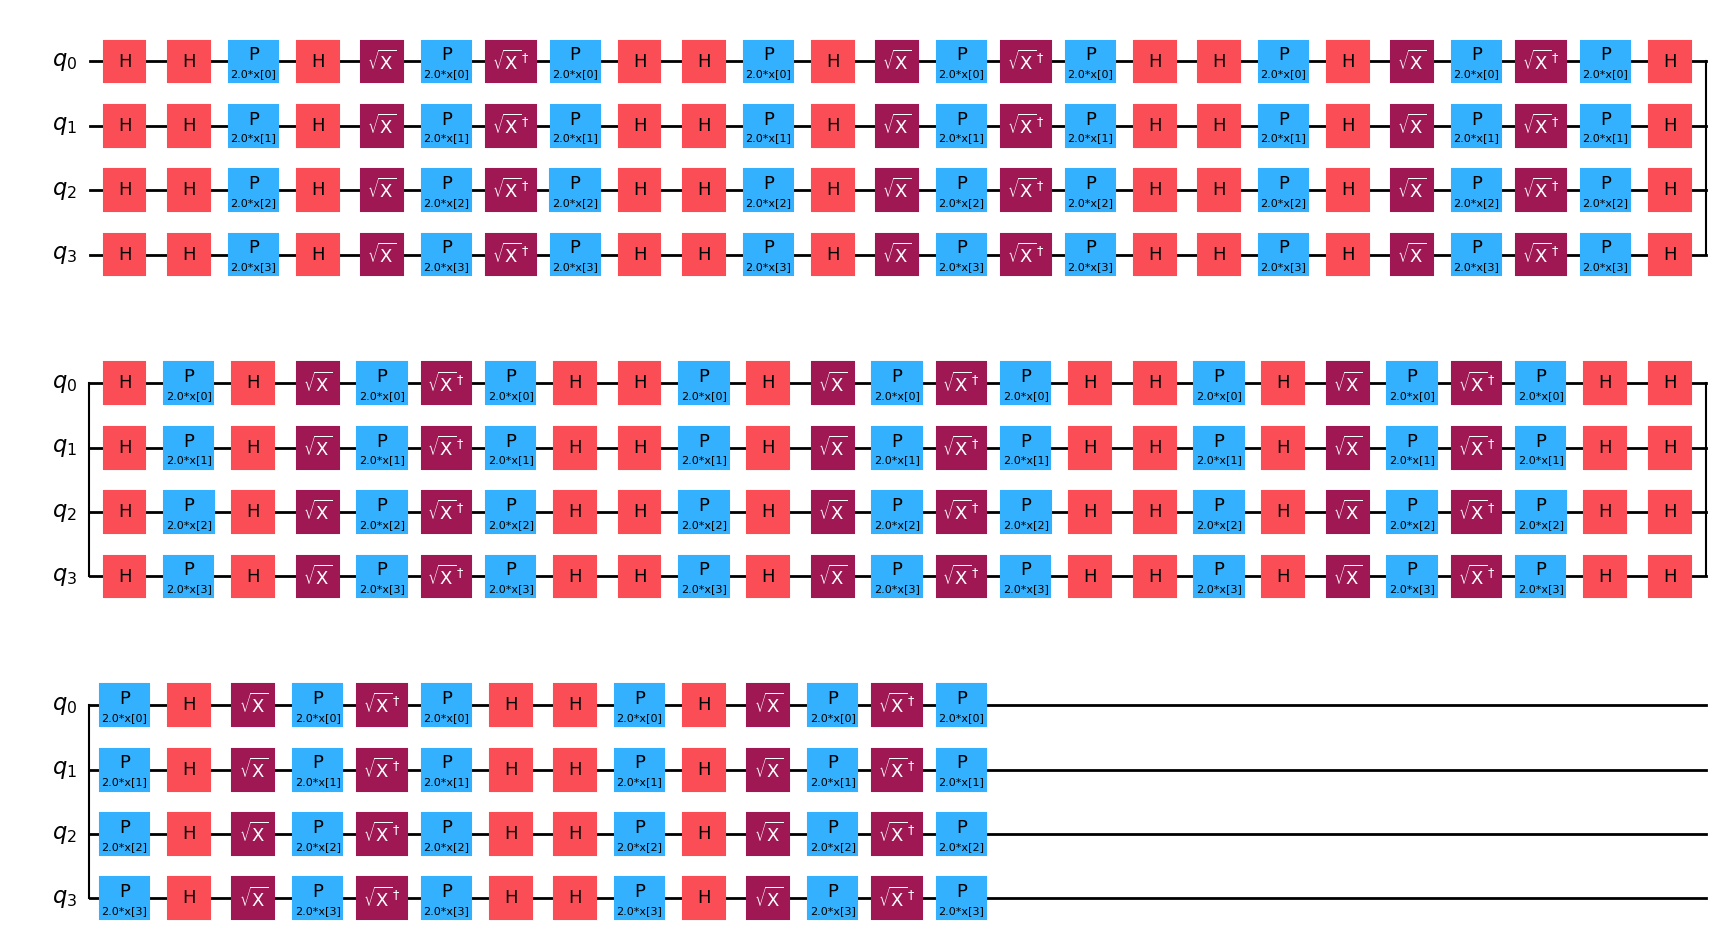

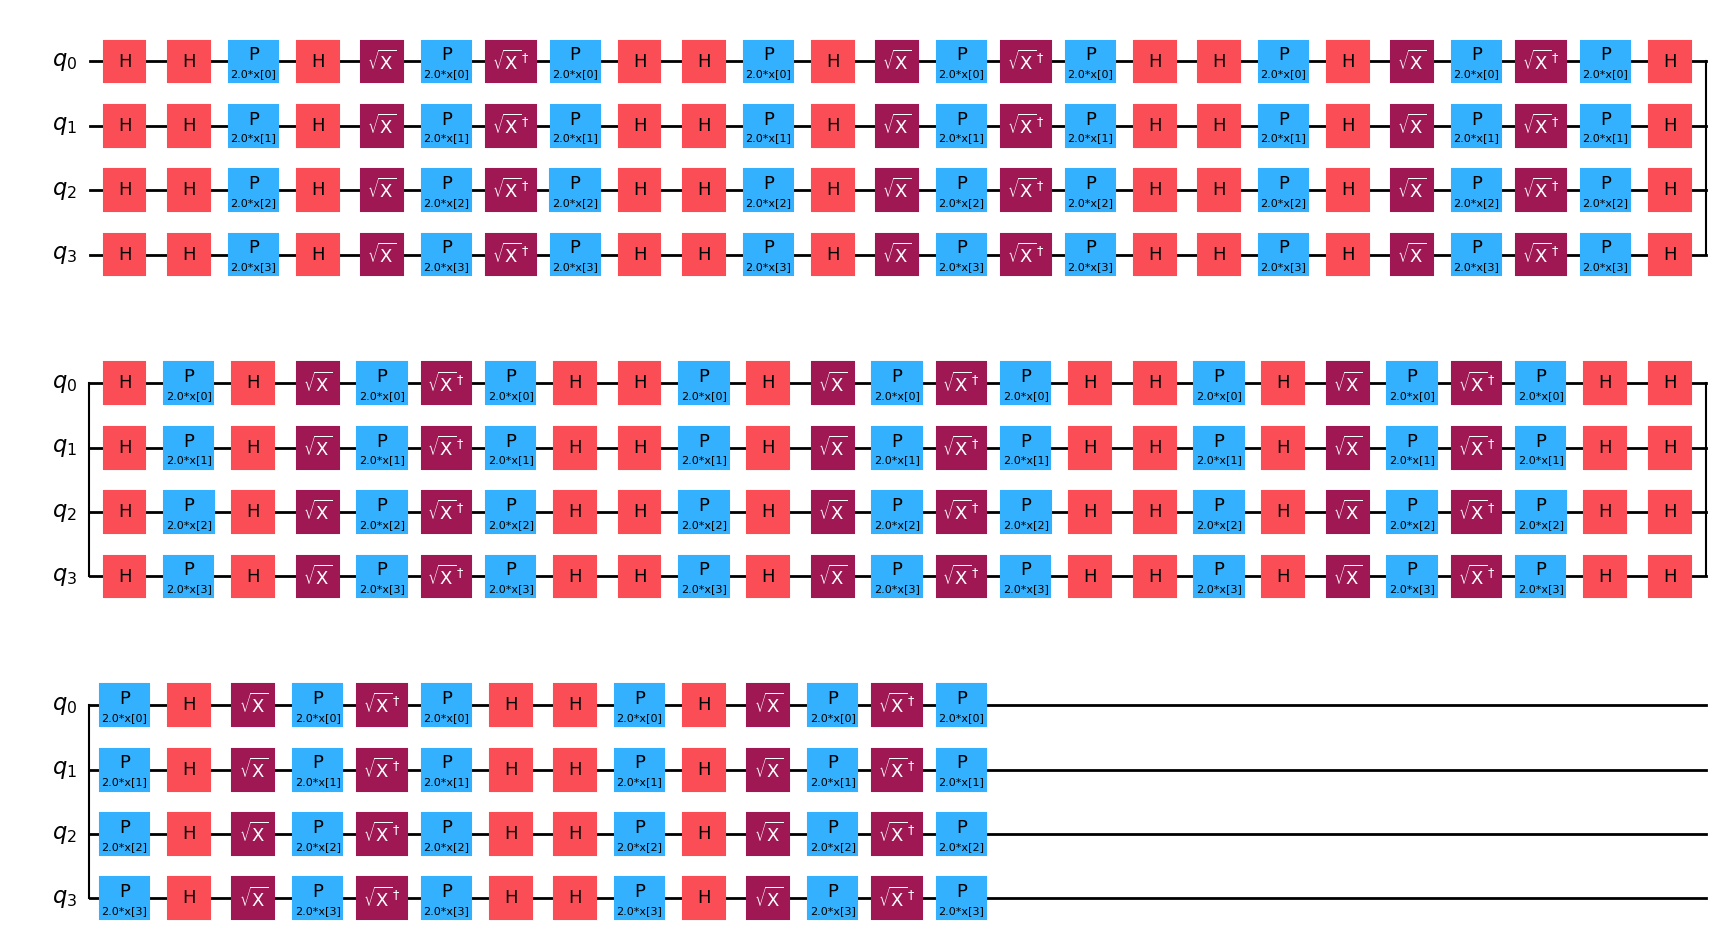

In [ ]:
pauli_feature_map.decompose().draw(output='mpl')
plt.show()
decomposed_pauli_feature_map = pauli_feature_map.decompose()
fig = decomposed_pauli_feature_map.draw(output='mpl')
fig.savefig('pauli_feature_map_circuit.png', dpi=250)

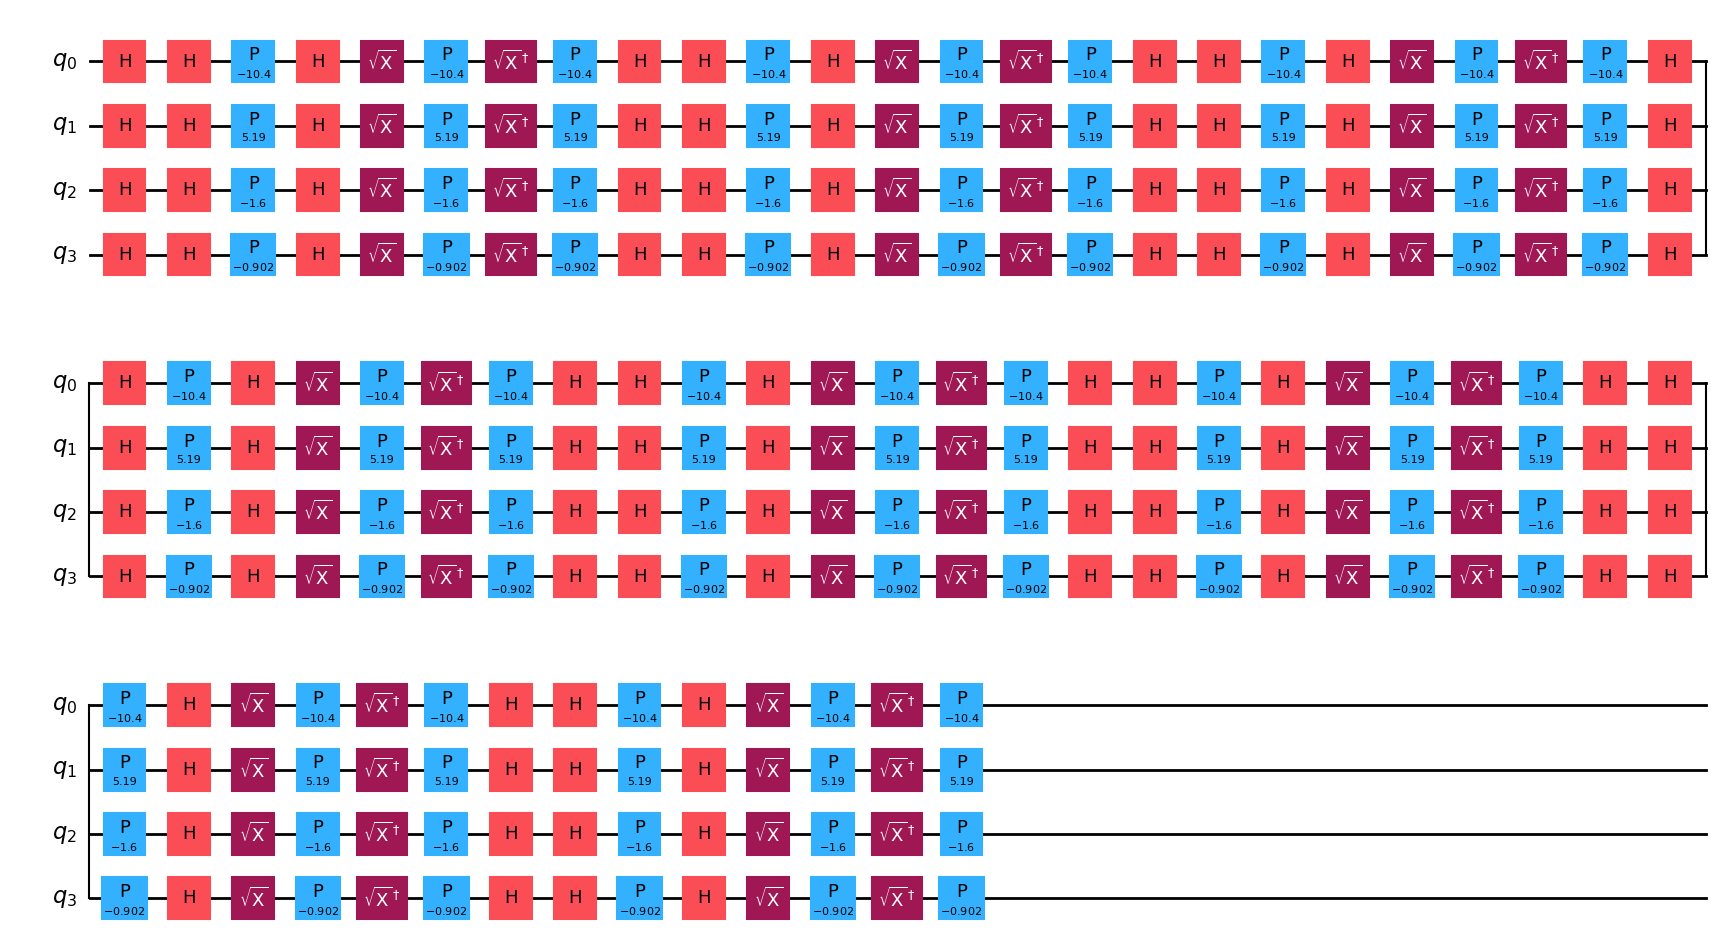

In [ ]:
sample_point = X_train[0]
bound_circuit = pauli_feature_map.assign_parameters(sample_point)
bound_circuit.decompose().draw(output='mpl')
plt.show()

## VQC

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, classification_report

from qiskit.circuit.library import RealAmplitudes, ZZFeatureMap
from qiskit_machine_learning.algorithms import VQC
from qiskit_machine_learning.optimizers import SPSA
from qiskit_aer import AerSimulator
from qiskit.visualization import circuit_drawer

In [ ]:
scaler = StandardScaler()
X = df_scaled.drop(columns=['Diabetic'])
y = df_scaled['Diabetic']
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=4)
X_pca = pca.fit_transform(X_scaled)

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=2)

In [ ]:
splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=2)
train_idx, test_idx = next(splitter.split(X_pca, y))

X_train, X_test = X_pca[train_idx], X_pca[test_idx]
y_train, y_test = y[train_idx], y[test_idx]

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [ ]:
feature_map = ZZFeatureMap(feature_dimension=X_pca.shape[1], reps=3)
ansatz = RealAmplitudes(num_qubits=X_pca.shape[1], reps=4)

optimizer = COBYLA(maxiter=100)

vqc = VQC(
    feature_map=feature_map,
    ansatz=ansatz,
    optimizer=optimizer,
    sampler=sampler
)


In [ ]:
vqc.fit(X_train, y_train_encoded)

In [ ]:
score_vqc = vqc.score(X_test, y_test_encoded)
print(f"VQC Accuracy: {score_vqc:.4f}")

y_pred = vqc.predict(X_test)
print(classification_report(y_test_encoded, y_pred))

VQC Accuracy: 0.6667
              precision    recall  f1-score   support

           0       1.00      0.33      0.50        15
           1       0.60      1.00      0.75        15

    accuracy                           0.67        30
   macro avg       0.80      0.67      0.62        30
weighted avg       0.80      0.67      0.62        30



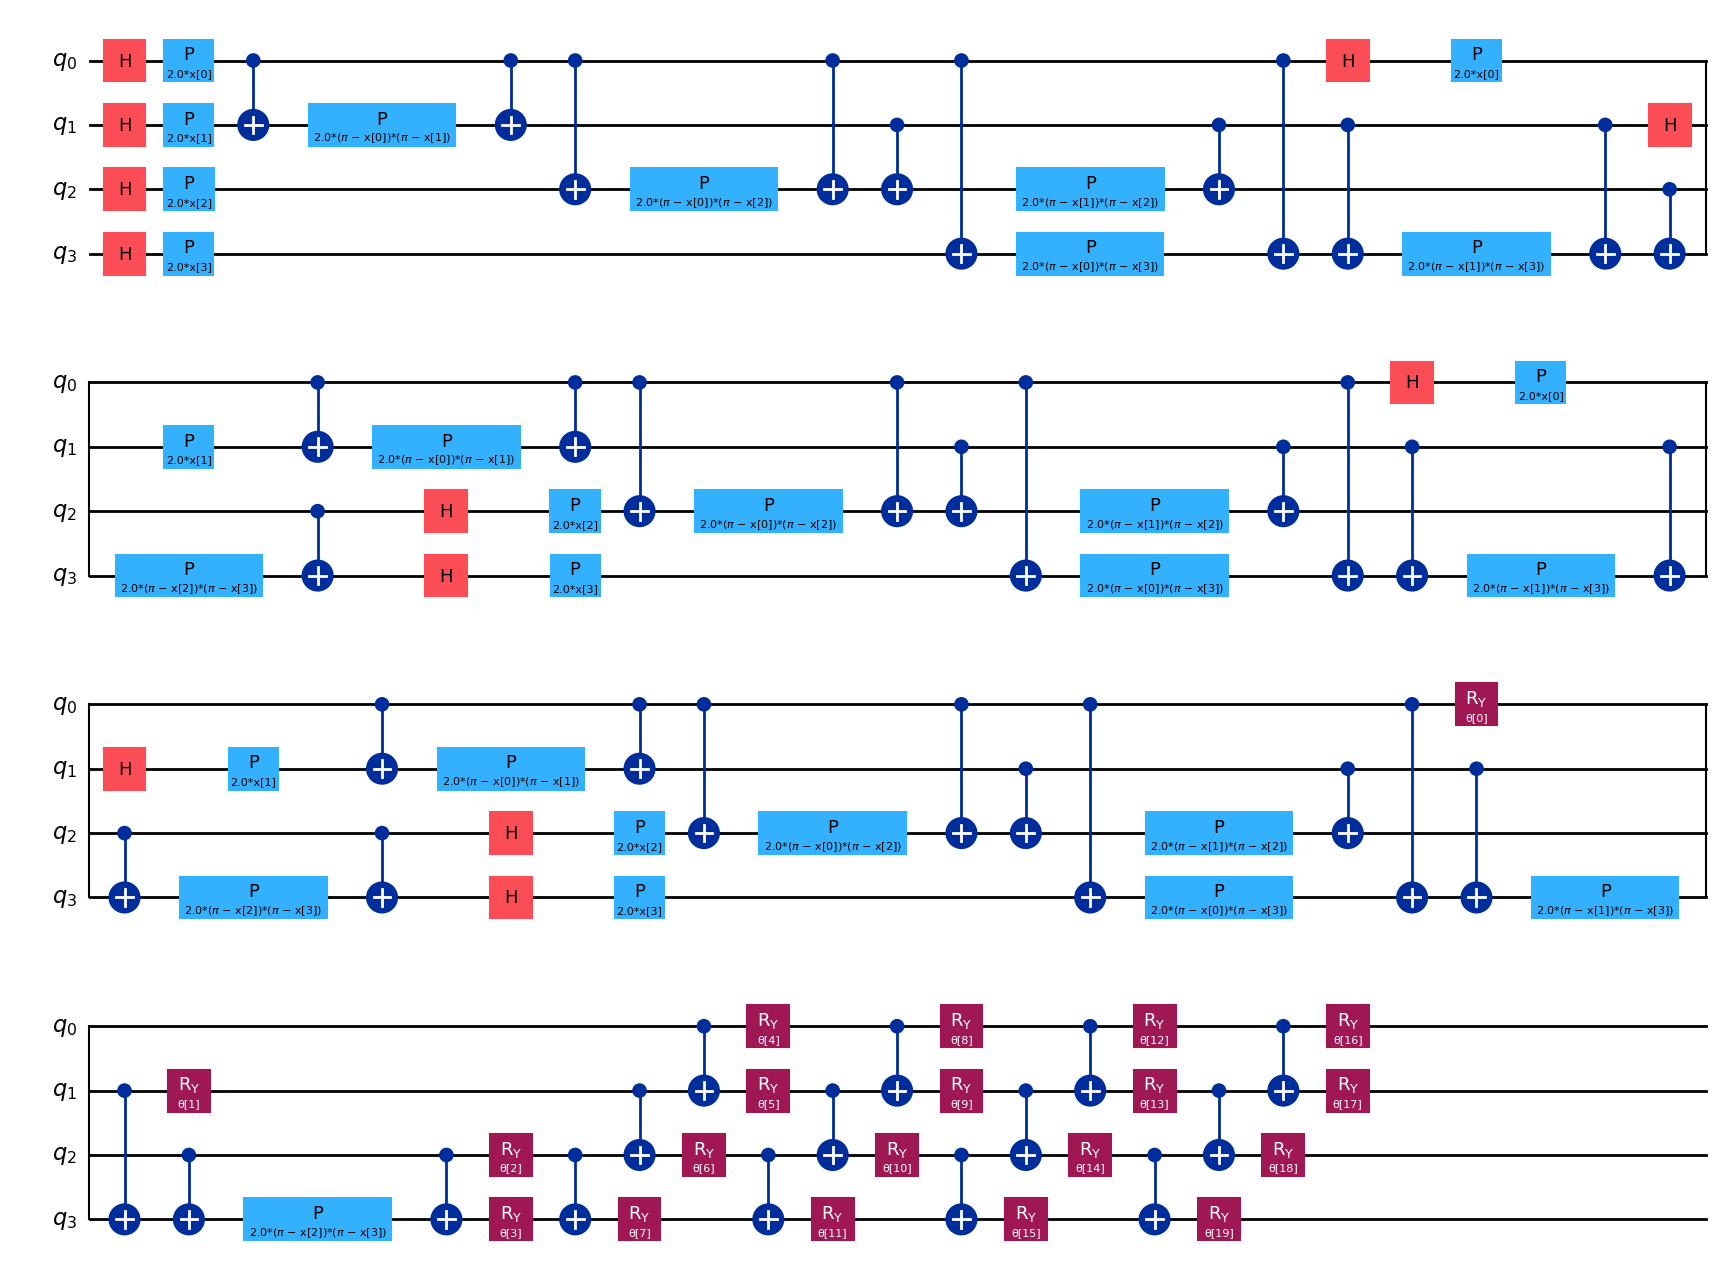

In [ ]:
combined_circuit = feature_map.compose(ansatz)
fig = combined_circuit.decompose().draw(output='mpl')
fig.savefig('vqc_circuit_ultra_res.png', dpi=300)

## QNN

In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

from qiskit.circuit import QuantumCircuit, ParameterVector
from qiskit.circuit.library import ZZFeatureMap, RealAmplitudes
from qiskit_machine_learning.neural_networks import SamplerQNN
from qiskit_machine_learning.algorithms import NeuralNetworkClassifier
from qiskit_aer import AerSimulator
from qiskit.visualization import circuit_drawer


In [ ]:
scaler = StandardScaler()
X = df_scaled.drop(columns=['Diabetic'])
y = df_scaled['Diabetic']
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=4)
X_pca = pca.fit_transform(X_scaled)

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=2)

In [ ]:
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)



### Model 1

In [ ]:
num_qubits = X_pca.shape[1]
num_features = X_pca.shape[1]

input_params = ParameterVector("x", num_features)
weight_params = ParameterVector("θ", num_qubits)

circuit_1 = QuantumCircuit(num_qubits)

In [ ]:
def parity(x):
    return "{:b}".format(x).count("1") % 2

simulator = AerSimulator()
from qiskit.primitives import Sampler
sampler = Sampler(options={'shots': 256, 'backend': simulator})

<ipython-input-20-f797874ceeda>:6: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  sampler = Sampler(options={'shots': 256, 'backend': simulator})


In [ ]:
qnn_1_feature_map = ZZFeatureMap(
    feature_dimension=num_features,
    reps=6,
    entanglement='circular'
)
ansatz = RealAmplitudes(num_qubits=num_qubits, reps=6, entanglement='full')

circuit_1 = QuantumCircuit(num_qubits)
circuit_1.append(qnn_1_feature_map, range(num_qubits))
circuit_1.append(ansatz, range(num_qubits))

sampl_qnn = SamplerQNN(
    circuit=circuit_1,
    input_params=qnn_1_feature_map.parameters,
    weight_params=ansatz.parameters,
    interpret=parity,
    output_shape=2,
    sampler=sampler
)
qnn_1_classifier = NeuralNetworkClassifier(
    neural_network=sampl_qnn,
    loss="cross_entropy",
    one_hot=True,
    optimizer=COBYLA(maxiter=200)
)


<ipython-input-21-3e0983507556>:12: DeprecationWarning: V1 Primitives are deprecated as of qiskit-machine-learning 0.8.0 and will be removed no sooner than 4 months after the release date. Use V2 primitives for continued compatibility and support.
  sampl_qnn = SamplerQNN(


In [ ]:
qnn_1_classifier.fit(X_train, y_train_encoded)

In [ ]:
y_pred_1 = qnn_1_classifier.predict(X_test)
accuracy_1 = accuracy_score(y_test_encoded, y_pred_1)

In [ ]:
# y_pred = qnn_1_classifier.predict(X_test)

print("\nClassification Report:\n")
print(classification_report(y_test_encoded, y_pred))

# accuracy_1 = accuracy_score(y_test_encoded, y_pred)
print(f"\nQNN Classifier Accuracy: {accuracy:.4f}")


Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.71      0.83        17
           1       0.72      1.00      0.84        13

    accuracy                           0.83        30
   macro avg       0.86      0.85      0.83        30
weighted avg       0.88      0.83      0.83        30


QNN Classifier Accuracy: 0.6667


In [ ]:
import matplotlib.pyplot as plt

decomposed_circuit = circuit_1.decompose()

fig = decomposed_circuit.draw(output='mpl')
fig.savefig('qnn_circuit_ultra_res.png', dpi=200)

# Show the figure
plt.show()


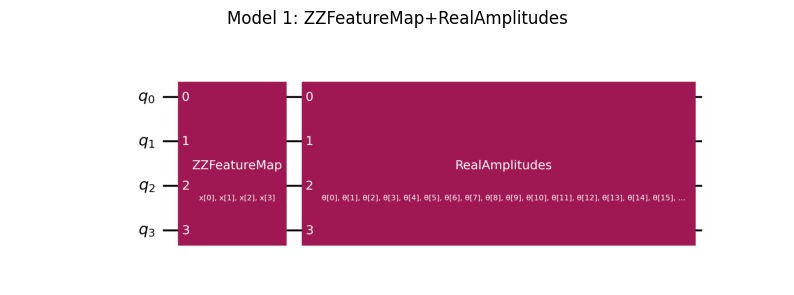

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('qnn_circuit_ultra_res.png')

plt.figure(figsize=(10, 6))
plt.imshow(img)
plt.axis('off')
plt.title("Model 1: ZZFeatureMap+RealAmplitudes")
plt.show()

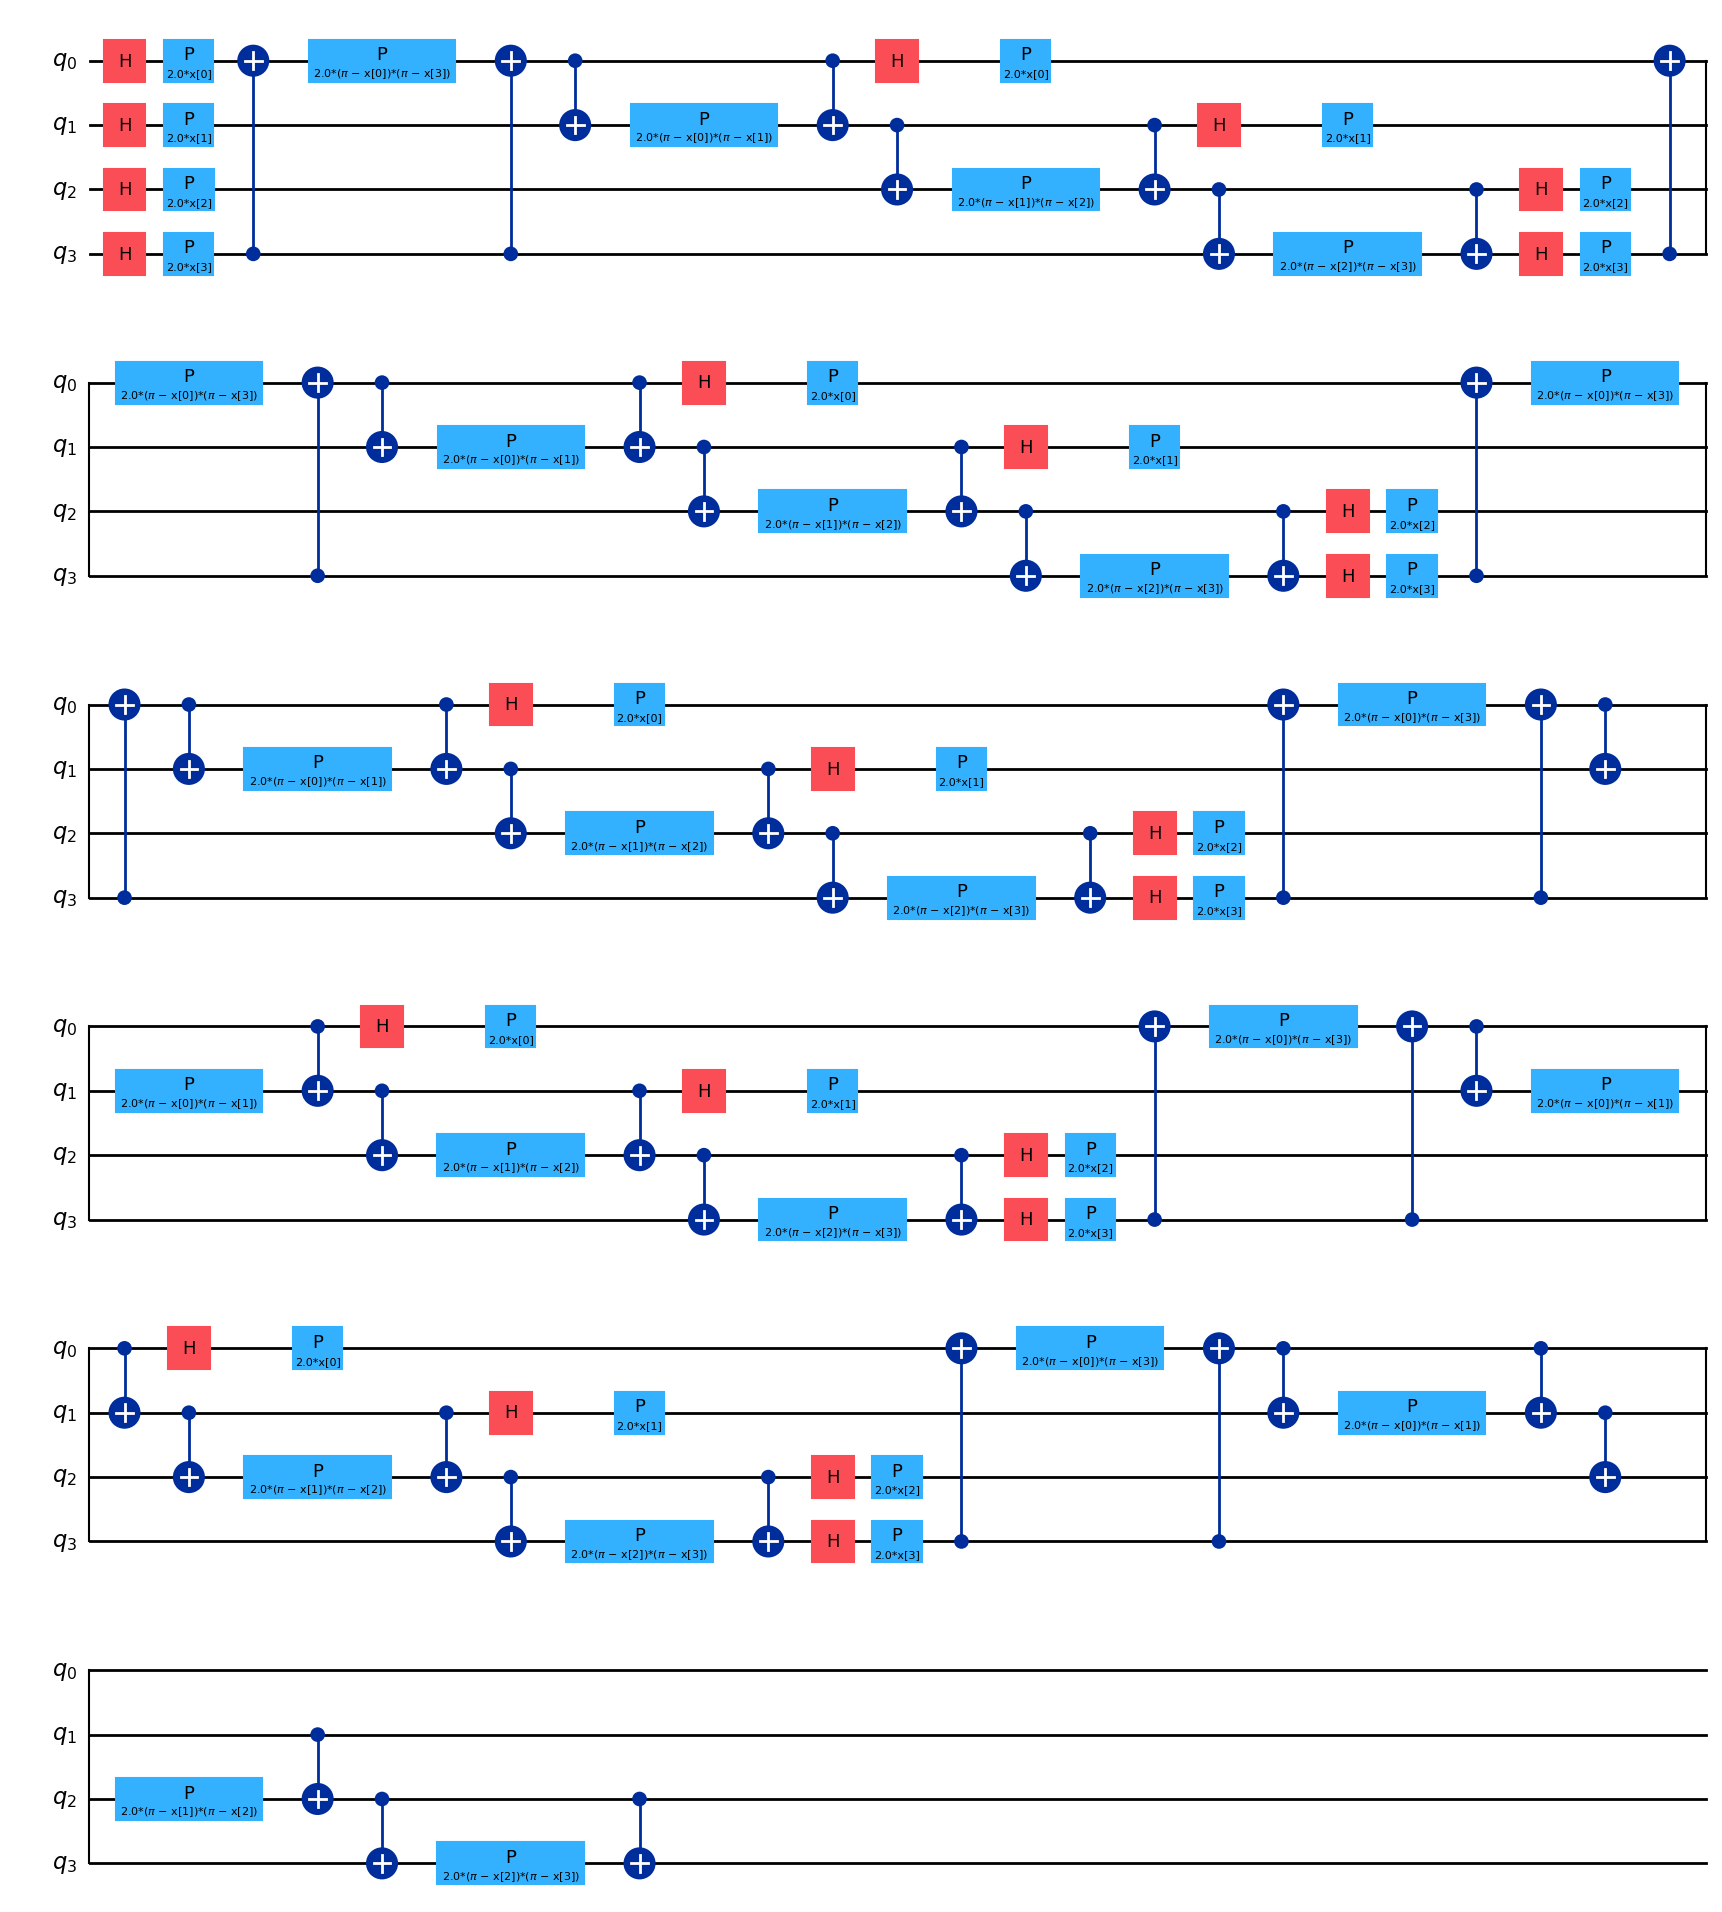

In [ ]:
qnn_1_feature_map.decompose().draw(output='mpl')
plt.show()

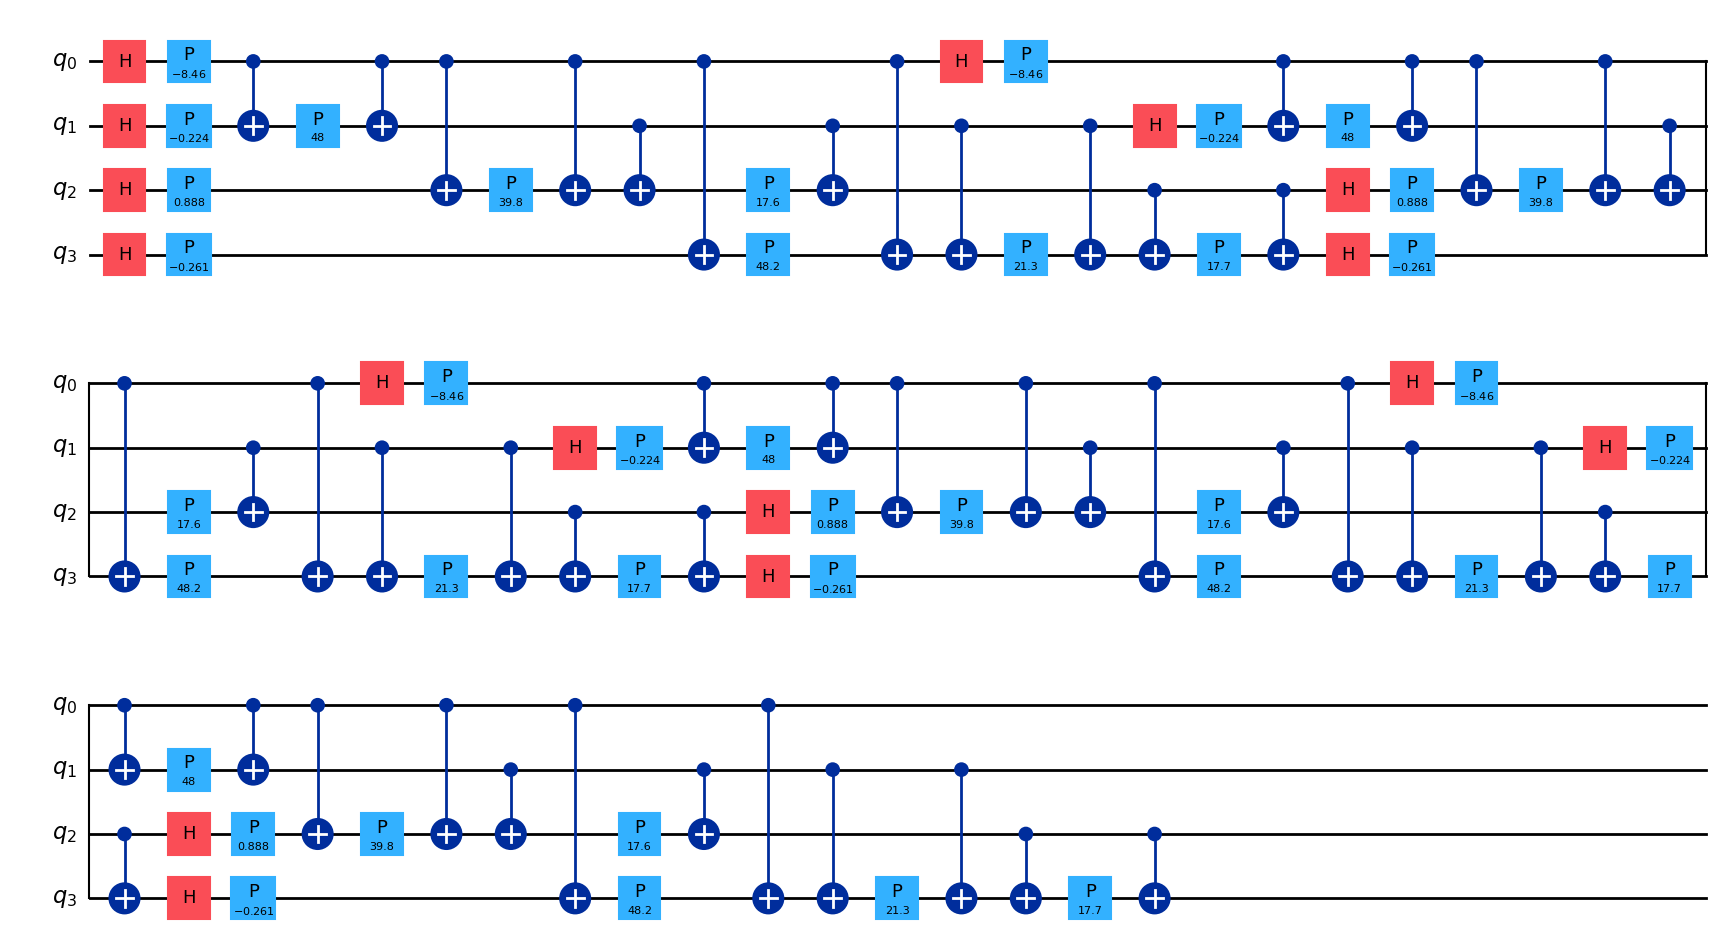

In [ ]:
sample_point = X_train[0]
bound_circuit = qnn_1_feature_map.assign_parameters(sample_point)
bound_circuit.decompose().draw(output='mpl')
plt.show()

### Model 2

In [ ]:
from qiskit.circuit.library import PauliFeatureMap, EfficientSU2

In [ ]:
feature_map_2 = PauliFeatureMap(feature_dimension=num_qubits, reps=1, paulis=['X', 'Y', 'Z'])
ansatz_2 = EfficientSU2(num_qubits=num_qubits, reps=2)

In [ ]:
circuit_2 = QuantumCircuit(num_qubits)
circuit_2.append(feature_map_2, range(num_qubits))
circuit_2.append(ansatz_2, range(num_qubits))

qnn_2 = SamplerQNN(
    circuit=circuit_2,
    input_params=feature_map_2.parameters,
    weight_params=ansatz_2.parameters,
    interpret=parity,
    output_shape=2,
)

classifier_2 = NeuralNetworkClassifier(
    neural_network=qnn_2,
    loss="cross_entropy",
    one_hot=True,
)

<ipython-input-174-87d4b5ad09eb>:5: DeprecationWarning: V1 Primitives are deprecated as of qiskit-machine-learning 0.8.0 and will be removed no sooner than 4 months after the release date. Use V2 primitives for continued compatibility and support.
  qnn_2 = SamplerQNN(


In [ ]:
classifier_2.fit(X_train, y_train_encoded)

In [ ]:
y_pred = classifier_2.predict(X_test)

print("\nClassification Report:\n")
print(classification_report(y_test_encoded, y_pred))

accuracy_2 = accuracy_score(y_test_encoded, y_pred)
print(f"\nQNN Classifier Accuracy: {accuracy:.4f}")


Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.35      0.52        17
           1       0.54      1.00      0.70        13

    accuracy                           0.63        30
   macro avg       0.77      0.68      0.61        30
weighted avg       0.80      0.63      0.60        30


QNN Classifier Accuracy: 0.6667


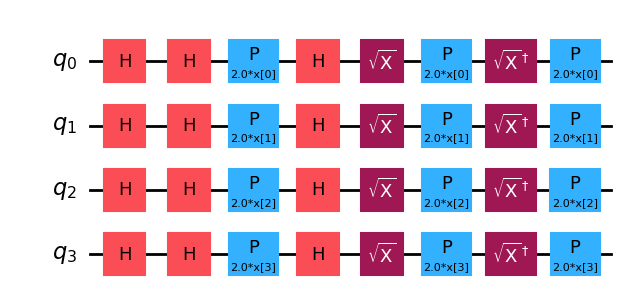

In [ ]:
feature_map_2.decompose().draw(output='mpl')
plt.show()

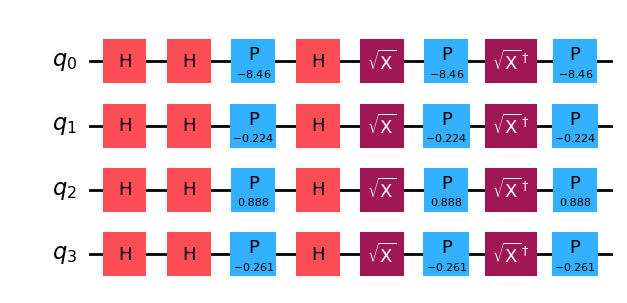

In [ ]:
sample_point = X_train[0]
bound_circuit = feature_map_2.assign_parameters(sample_point)
bound_circuit.decompose().draw(output='mpl')
plt.show()

Model 2 Circuit:


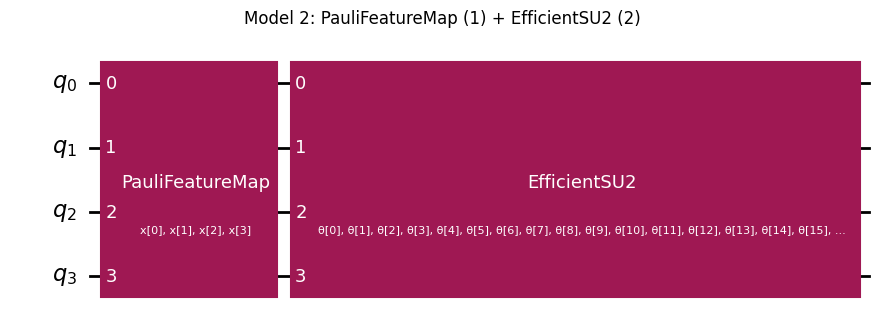

In [ ]:
print("Model 2 Circuit:")
circuit_2.decompose().draw(output='mpl')
plt.title("Model 2: PauliFeatureMap (1) + EfficientSU2 (2)")
plt.show()

### Model 3

In [ ]:
from qiskit.circuit.library import TwoLocal

In [ ]:
feature_map_3 = ZZFeatureMap(feature_dimension=num_qubits, reps=1, entanglement='linear')

ansatz_3 = TwoLocal(num_qubits=num_qubits, rotation_blocks='ry', entanglement_blocks='cx', reps=1)

circuit_3 = QuantumCircuit(num_qubits)
circuit_3.append(feature_map_3, range(num_qubits))
circuit_3.append(ansatz_3, range(num_qubits))

In [ ]:
qnn_3 = SamplerQNN(
    circuit=circuit_3,
    input_params=feature_map_3.parameters,
    weight_params=ansatz_3.parameters,
    interpret=parity,
    output_shape=2,
)

classifier_3 = NeuralNetworkClassifier(
    neural_network=qnn_3,
    loss="cross_entropy",
    one_hot=True,
)

<ipython-input-182-b8ffe5b9012a>:1: DeprecationWarning: V1 Primitives are deprecated as of qiskit-machine-learning 0.8.0 and will be removed no sooner than 4 months after the release date. Use V2 primitives for continued compatibility and support.
  qnn_3 = SamplerQNN(


In [ ]:
classifier_3.fit(X_train, y_train_encoded)

In [ ]:
y_pred_3 = classifier_3.predict(X_test)
accuracy_3 = accuracy_score(y_test_encoded, y_pred_3)

In [ ]:
print(classification_report(y_test_encoded, y_pred_3))
print(f"Model 3 Accuracy: {accuracy_3:.4f}")

              precision    recall  f1-score   support

           0       1.00      0.41      0.58        17
           1       0.57      1.00      0.72        13

    accuracy                           0.67        30
   macro avg       0.78      0.71      0.65        30
weighted avg       0.81      0.67      0.64        30

Model 3 Accuracy: 0.6667


In [ ]:
print(classifier_3)

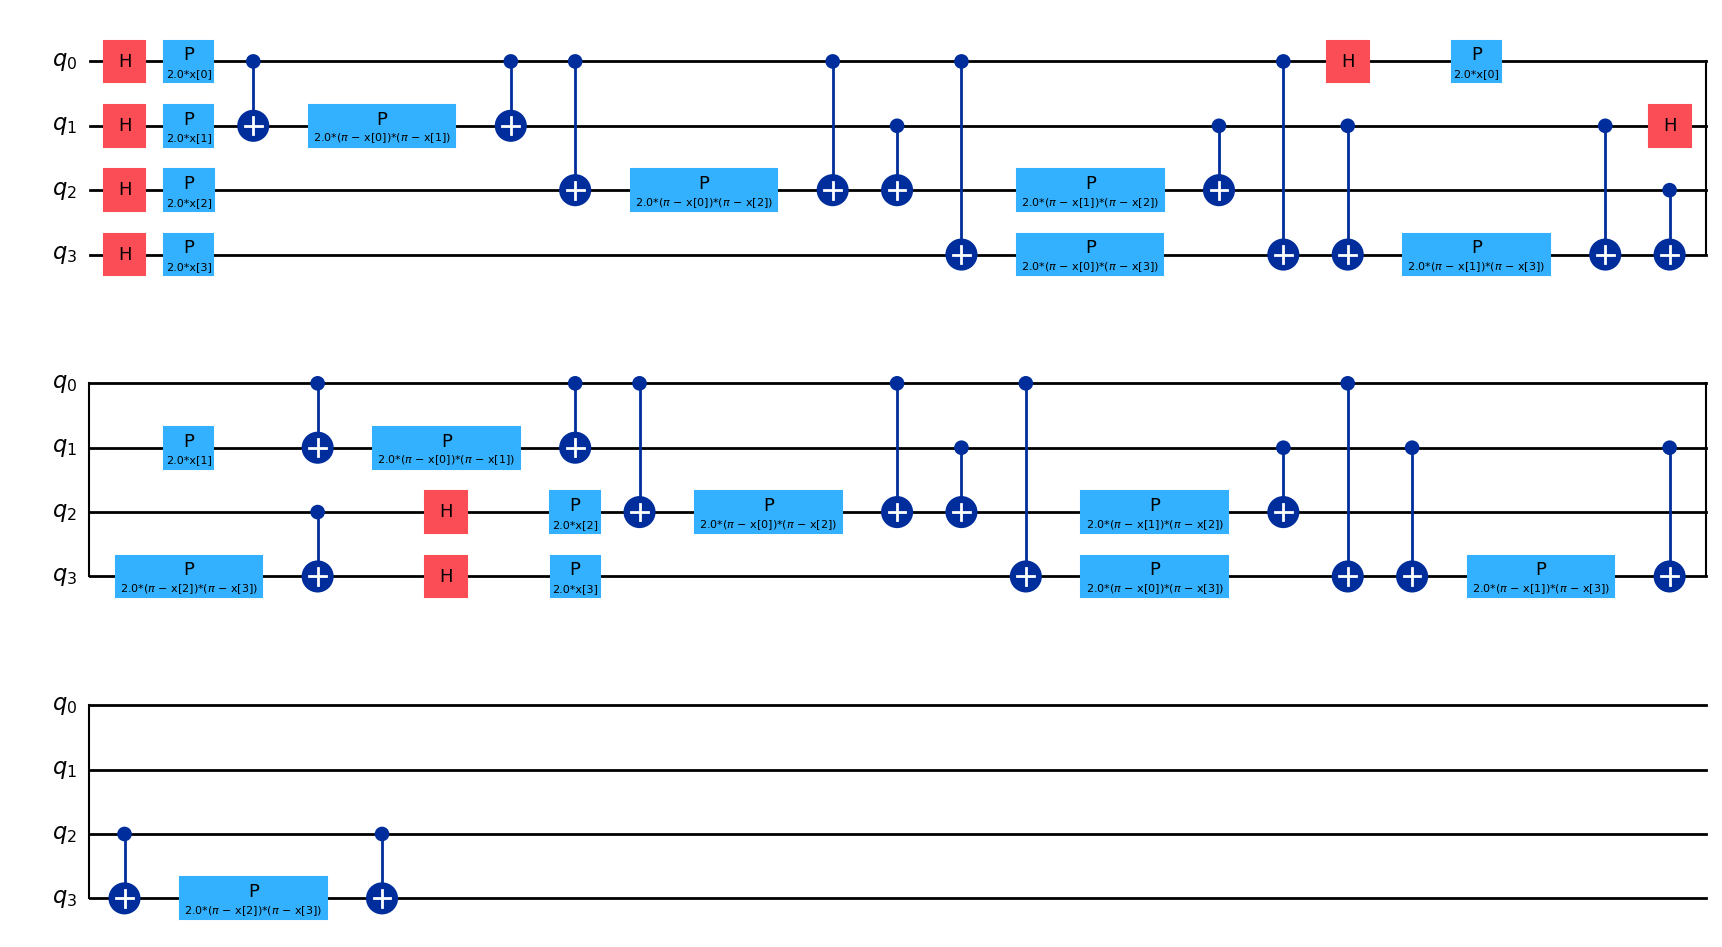

In [ ]:
feature_map_3.decompose().draw(output='mpl')
plt.show()

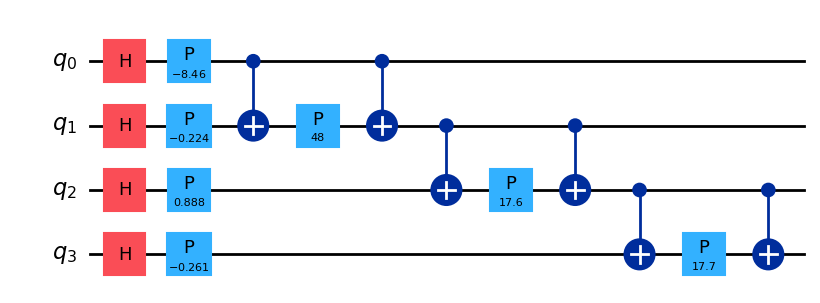

In [ ]:
sample_point = X_train[0]
bound_circuit = feature_map_3.assign_parameters(sample_point)
bound_circuit.decompose().draw(output='mpl')
plt.show()

Model 3 Circuit:


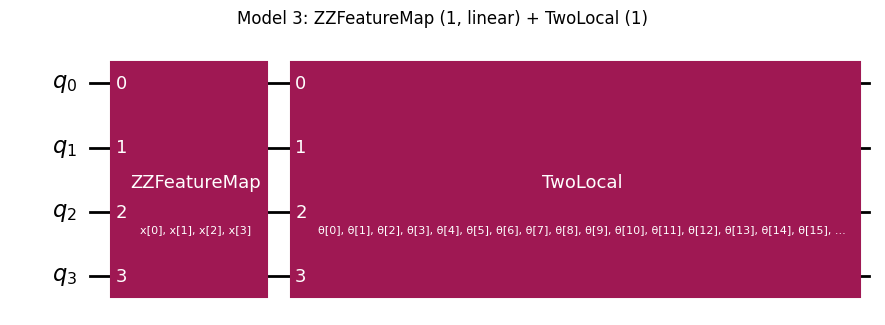

In [ ]:
print("Model 3 Circuit:")
circuit_3.decompose().draw(output='mpl')
plt.title("Model 3: ZZFeatureMap (1, linear) + TwoLocal (1)")
plt.show()

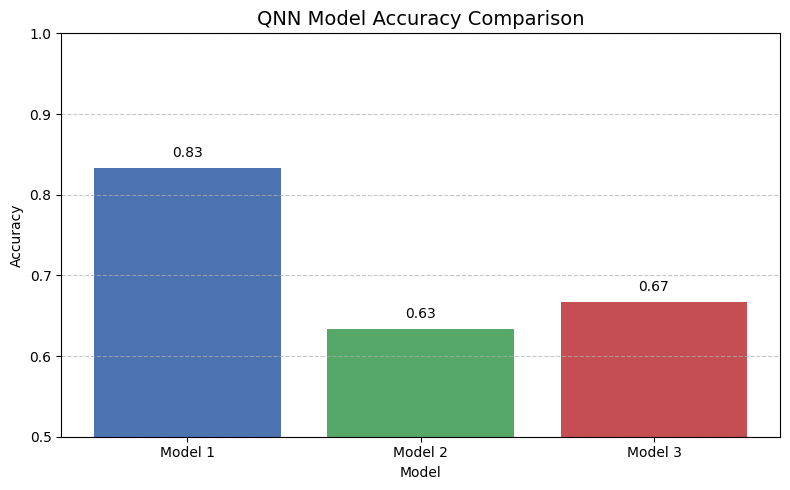

In [ ]:
import matplotlib.pyplot as plt

accuracies = [accuracy_1, accuracy_2, accuracy_3]
model_names = ['Model 1', 'Model 2', 'Model 3']
colors = ['#4C72B0', '#55A868', '#C44E52']

plt.figure(figsize=(8, 5))
bars = plt.bar(model_names, accuracies, color=colors)
plt.ylim(0.5, 1.0)
plt.title('QNN Model Accuracy Comparison', fontsize=14)
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.grid(axis='y', linestyle='--', alpha=0.7)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{yval:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import f1_score

f1_1 = f1_score(y_test_encoded, y_pred_1, average='weighted')
f1_2 = f1_score(y_test_encoded, y_pred, average='weighted')
f1_3 = f1_score(y_test_encoded, y_pred_3, average='weighted')


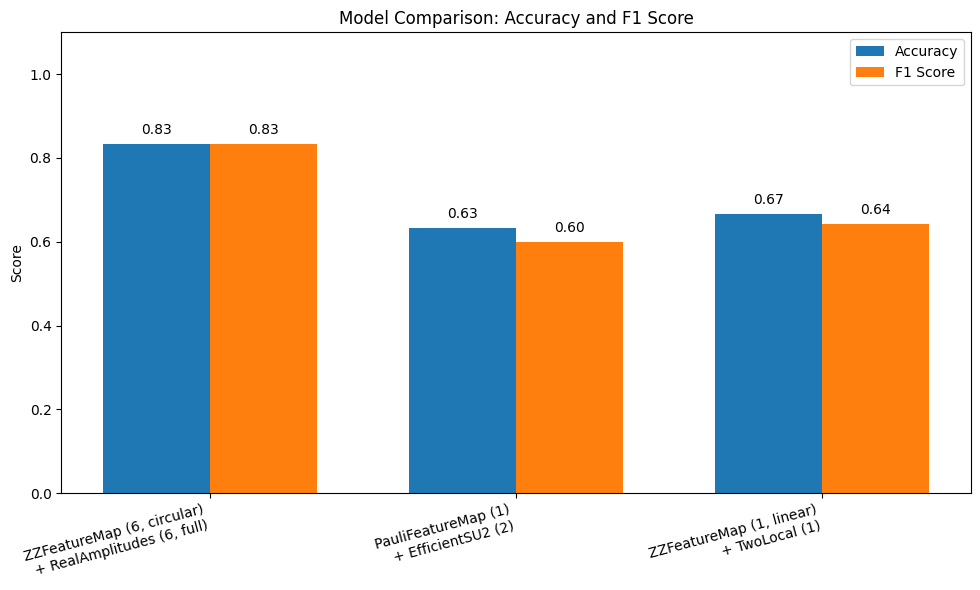

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

model_names = [
    "ZZFeatureMap (6, circular)\n+ RealAmplitudes (6, full)",
    "PauliFeatureMap (1)\n+ EfficientSU2 (2)",
    "ZZFeatureMap (1, linear)\n+ TwoLocal (1)"
]

accuracies = [accuracy_1, accuracy_2, accuracy_3]
f1_scores = [f1_1, f1_2, f1_3]

x = np.arange(len(model_names))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, accuracies, width, label='Accuracy')
rects2 = ax.bar(x + width/2, f1_scores, width, label='F1 Score')

ax.set_ylabel('Score')
ax.set_title('Model Comparison: Accuracy and F1 Score')
ax.set_xticks(x)
ax.set_xticklabels(model_names, rotation=15, ha='right')
ax.legend()
ax.set_ylim(0, 1.1)

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 5),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.tight_layout()
plt.show()

##Hybrid

In [ ]:
import torch

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import torch
import torch.nn as nn
import torch.optim as optim
from qiskit_machine_learning.connectors import TorchConnector

In [ ]:
scaler = StandardScaler()
X = df_scaled.drop(columns=['Diabetic'])
y = df_scaled['Diabetic']
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=4)
X_pca = pca.fit_transform(X_scaled)

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=2)

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [ ]:
num_features = X_train.shape[1]

class HybridModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(num_features, 4)
        self.qnn = TorchConnector(sampl_qnn)
        self.fc2 = nn.Linear(2, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.qnn(x)
        x = self.fc2(x)
        return x

In [ ]:
model = HybridModel()
optimizer = optim.Adam(model.parameters(), lr=0.01)
loss_fn = nn.BCELoss()

In [ ]:
accuracy_list = []
f1_list = []
precision_list = []
recall_list = []

for epoch in range(10):
    model.train()
    optimizer.zero_grad()

    inputs = torch.tensor(X_train, dtype=torch.float32)
    targets = torch.tensor(y_train_encoded, dtype=torch.float32).unsqueeze(1)

    output = model(inputs)
    loss = loss_fn(output, targets)
    loss.backward()
    optimizer.step()

    model.eval()
    with torch.no_grad():
        test_inputs = torch.tensor(X_test, dtype=torch.float32)
        test_targets = torch.tensor(y_test_encoded, dtype=torch.float32).unsqueeze(1)

        test_outputs = model(test_inputs)
        predictions = (test_outputs.detach().numpy() > 0.5).astype(int)

        accuracy = accuracy_score(y_test_encoded, predictions)
        f1 = f1_score(y_test_encoded, predictions)
        precision = precision_score(y_test_encoded, predictions)
        recall = recall_score(y_test_encoded, predictions)

        accuracy_list.append(accuracy)
        f1_list.append(f1)
        precision_list.append(precision)
        recall_list.append(recall)


In [ ]:
print(f"Final Accuracy: {accuracy_list[-1]:.4f}")
print(f"Final F1 Score: {f1_list[-1]:.4f}")
print(f"Final Precision: {precision_list[-1]:.4f}")
print(f"Final Recall: {recall_list[-1]:.4f}")

Final Accuracy: 0.7333
Final F1 Score: 0.7647
Final Precision: 0.6190
Final Recall: 1.0000
